In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_10degree_1rev.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((37*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_10deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((37*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.3,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(155, 100, 100)


In [17]:
print(y_test.shape)

(67, 100, 100)


In [18]:
print(x_train.shape)

(155, 15, 1)


In [19]:
print(x_test.shape)

(67, 15, 1)


In [20]:
theta_train.shape

(155,)

In [21]:
tsr_train.shape

(155,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [24]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((155, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((67, 2, 1))

In [28]:
tsr_theta_train.shape

(155, 2, 1)

In [29]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
4/4 [==============================] - 1s 5ms/step - loss: 0.0243 - rmse: 0.1559
Epoch 2/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0203 - rmse: 0.1426
Epoch 3/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0197 - rmse: 0.1405
Epoch 4/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0198 - rmse: 0.1406
Epoch 5/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 6/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 7/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 8/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 9/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1384
Epoch 10/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 11/10000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 87/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 88/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 89/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 90/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 91/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 92/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 93/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 94/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 95/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1306
Epoch 96/10000
4/4 [==============================] - 0

4/4 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1231
Epoch 171/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1228
Epoch 172/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1234
Epoch 173/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1236
Epoch 174/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1234
Epoch 175/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1229
Epoch 176/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1232
Epoch 177/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1244
Epoch 178/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1231
Epoch 179/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1224
Epoch 180/10000
4/4 [=========================

4/4 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1181
Epoch 255/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1182
Epoch 256/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1183
Epoch 257/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1187
Epoch 258/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1182
Epoch 259/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1183
Epoch 260/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.1176
Epoch 261/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0139 - rmse: 0.1178
Epoch 262/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.1175
Epoch 263/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.1175
Epoch 264/10000
4/4 [=========================

4/4 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1127
Epoch 339/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1141
Epoch 340/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0127 - rmse: 0.1126
Epoch 341/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0126 - rmse: 0.1121
Epoch 342/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0126 - rmse: 0.1121
Epoch 343/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1116
Epoch 344/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.1123
Epoch 345/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0129 - rmse: 0.1134
Epoch 346/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1129
Epoch 347/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1120
Epoch 348/10000
4/4 [=========================

4/4 [==============================] - 0s 3ms/step - loss: 0.0111 - rmse: 0.1056
Epoch 423/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.1050
Epoch 424/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1061
Epoch 425/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1059
Epoch 426/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0111 - rmse: 0.1055
Epoch 427/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0112 - rmse: 0.1059
Epoch 428/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0111 - rmse: 0.1052
Epoch 429/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1059
Epoch 430/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0117 - rmse: 0.1080
Epoch 431/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.1046
Epoch 432/10000
4/4 [=========================

4/4 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0974
Epoch 507/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0977
Epoch 508/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0095 - rmse: 0.0974
Epoch 509/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0096 - rmse: 0.0980
Epoch 510/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0989
Epoch 511/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0097 - rmse: 0.0983
Epoch 512/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0097 - rmse: 0.0983
Epoch 513/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0977
Epoch 514/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0094 - rmse: 0.0972
Epoch 515/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0095 - rmse: 0.0975
Epoch 516/10000
4/4 [=========================

4/4 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0893
Epoch 591/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0888
Epoch 592/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0883
Epoch 593/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0883
Epoch 594/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0884
Epoch 595/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0875
Epoch 596/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0880
Epoch 597/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0886
Epoch 598/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0878
Epoch 599/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0881
Epoch 600/10000
4/4 [=========================

4/4 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0803
Epoch 675/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0803
Epoch 676/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0799
Epoch 677/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0799
Epoch 678/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0800
Epoch 679/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0066 - rmse: 0.0811
Epoch 680/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0065 - rmse: 0.0807
Epoch 681/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0808
Epoch 682/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0063 - rmse: 0.0791
Epoch 683/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0794
Epoch 684/10000
4/4 [=========================

4/4 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 759/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 760/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 761/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0054 - rmse: 0.0734
Epoch 762/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 763/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0054 - rmse: 0.0733
Epoch 764/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0054 - rmse: 0.0732
Epoch 765/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0053 - rmse: 0.0728
Epoch 766/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0728
Epoch 767/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0728
Epoch 768/10000
4/4 [=========================

4/4 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0686
Epoch 843/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 844/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0693
Epoch 845/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 846/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 847/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0678
Epoch 848/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 849/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0676
Epoch 850/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0678
Epoch 851/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 852/10000
4/4 [=========================

4/4 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 927/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0038 - rmse: 0.0619
Epoch 928/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 929/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 930/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0038 - rmse: 0.0619
Epoch 931/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 932/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 933/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0038 - rmse: 0.0618
Epoch 934/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 935/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 936/10000
4/4 [=========================

4/4 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 1011/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0568
Epoch 1012/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0567
Epoch 1013/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 1014/10000
4/4 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 1015/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 1016/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0602
Epoch 1017/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 1018/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 1019/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0585
Epoch 1020/10000
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 1094/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 1095/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 1096/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 1097/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 1098/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 1099/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 1100/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 1101/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 1102/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0494
Epoch 1103/10000
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 1177/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 1178/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0452
Epoch 1179/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 1180/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0441
Epoch 1181/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 1182/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0441
Epoch 1183/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 1184/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 1185/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 1186/10000
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0406
Epoch 1260/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 1261/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 1262/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 1263/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 1264/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 1265/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 1266/10000
4/4 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 1267/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 1268/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 1269/10000
4/4 [==============

4/4 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 1343/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0323
Epoch 1344/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0322
Epoch 1345/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 1346/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 1347/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0338
Epoch 1348/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 1349/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0322
Epoch 1350/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0324
Epoch 1351/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.9869e-04 - rmse: 0.0316
Epoch 1352/10000
4/4 [===========

4/4 [==============================] - 0s 4ms/step - loss: 7.9210e-04 - rmse: 0.0281
Epoch 1424/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.3005e-04 - rmse: 0.0288
Epoch 1425/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.2095e-04 - rmse: 0.0287
Epoch 1426/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.0334e-04 - rmse: 0.0283
Epoch 1427/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.1728e-04 - rmse: 0.0286
Epoch 1428/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.2614e-04 - rmse: 0.0287
Epoch 1429/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.0766e-04 - rmse: 0.0284
Epoch 1430/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.2467e-04 - rmse: 0.0287
Epoch 1431/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.1459e-04 - rmse: 0.0302
Epoch 1432/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.7211e-04 - rmse: 0.02

4/4 [==============================] - 0s 4ms/step - loss: 6.5998e-04 - rmse: 0.0257
Epoch 1504/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.1732e-04 - rmse: 0.0248
Epoch 1505/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.0426e-04 - rmse: 0.0265
Epoch 1506/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.0148e-04 - rmse: 0.0265
Epoch 1507/10000
4/4 [==============================] - 0s 3ms/step - loss: 7.3961e-04 - rmse: 0.0272
Epoch 1508/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.7776e-04 - rmse: 0.0260
Epoch 1509/10000
4/4 [==============================] - 0s 3ms/step - loss: 6.7438e-04 - rmse: 0.0260
Epoch 1510/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.1656e-04 - rmse: 0.0248
Epoch 1511/10000
4/4 [==============================] - 0s 3ms/step - loss: 5.8365e-04 - rmse: 0.0242
Epoch 1512/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.7137e-04 - rmse: 0.02

4/4 [==============================] - 0s 4ms/step - loss: 5.1063e-04 - rmse: 0.0226
Epoch 1584/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.8699e-04 - rmse: 0.0221
Epoch 1585/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.1622e-04 - rmse: 0.0227
Epoch 1586/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.7853e-04 - rmse: 0.0219
Epoch 1587/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2562e-04 - rmse: 0.0206
Epoch 1588/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3475e-04 - rmse: 0.0209
Epoch 1589/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2833e-04 - rmse: 0.0207
Epoch 1590/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.5296e-04 - rmse: 0.0213
Epoch 1591/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.7293e-04 - rmse: 0.0217
Epoch 1592/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.5905e-04 - rmse: 0.02

4/4 [==============================] - 0s 4ms/step - loss: 4.5582e-04 - rmse: 0.0213
Epoch 1664/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.1762e-04 - rmse: 0.0204
Epoch 1665/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.1637e-04 - rmse: 0.0204
Epoch 1666/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.5262e-04 - rmse: 0.0213
Epoch 1667/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.1589e-04 - rmse: 0.0204
Epoch 1668/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6963e-04 - rmse: 0.0192
Epoch 1669/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6373e-04 - rmse: 0.0191
Epoch 1670/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4972e-04 - rmse: 0.0187
Epoch 1671/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.3436e-04 - rmse: 0.0183
Epoch 1672/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4397e-04 - rmse: 0.01

4/4 [==============================] - 0s 4ms/step - loss: 2.5799e-04 - rmse: 0.0161
Epoch 1744/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4468e-04 - rmse: 0.0156
Epoch 1745/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4485e-04 - rmse: 0.0156
Epoch 1746/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4873e-04 - rmse: 0.0158
Epoch 1747/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7120e-04 - rmse: 0.0165
Epoch 1748/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7317e-04 - rmse: 0.0165
Epoch 1749/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6754e-04 - rmse: 0.0164
Epoch 1750/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7524e-04 - rmse: 0.0166
Epoch 1751/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6582e-04 - rmse: 0.0163
Epoch 1752/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5832e-04 - rmse: 0.01

4/4 [==============================] - 0s 4ms/step - loss: 2.1661e-04 - rmse: 0.0147
Epoch 1824/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1329e-04 - rmse: 0.0146
Epoch 1825/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4161e-04 - rmse: 0.0155
Epoch 1826/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3895e-04 - rmse: 0.0155
Epoch 1827/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3244e-04 - rmse: 0.0152
Epoch 1828/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2102e-04 - rmse: 0.0149
Epoch 1829/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.9916e-04 - rmse: 0.0141
Epoch 1830/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.9122e-04 - rmse: 0.0138
Epoch 1831/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.8646e-04 - rmse: 0.0137
Epoch 1832/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9800e-04 - rmse: 0.01

4/4 [==============================] - 0s 4ms/step - loss: 1.6152e-04 - rmse: 0.0127
Epoch 1904/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6488e-04 - rmse: 0.0128
Epoch 1905/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5277e-04 - rmse: 0.0124
Epoch 1906/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5409e-04 - rmse: 0.0124
Epoch 1907/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4812e-04 - rmse: 0.0122
Epoch 1908/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5341e-04 - rmse: 0.0124
Epoch 1909/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4943e-04 - rmse: 0.0122
Epoch 1910/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5934e-04 - rmse: 0.0126
Epoch 1911/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6839e-04 - rmse: 0.0130
Epoch 1912/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7571e-04 - rmse: 0.01

4/4 [==============================] - 0s 3ms/step - loss: 1.1997e-04 - rmse: 0.0110
Epoch 1984/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2739e-04 - rmse: 0.0113
Epoch 1985/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2677e-04 - rmse: 0.0113
Epoch 1986/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2077e-04 - rmse: 0.0110
Epoch 1987/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1879e-04 - rmse: 0.0109
Epoch 1988/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2268e-04 - rmse: 0.0111
Epoch 1989/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.2180e-04 - rmse: 0.0110
Epoch 1990/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4493e-04 - rmse: 0.0120
Epoch 1991/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2985e-04 - rmse: 0.0114
Epoch 1992/10000
4/4 [==============================] - 0s 7ms/step - loss: 1.2762e-04 - rmse: 0.01

4/4 [==============================] - 0s 3ms/step - loss: 1.1617e-04 - rmse: 0.0108
Epoch 2064/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6700e-04 - rmse: 0.0129
Epoch 2065/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.8123e-04 - rmse: 0.0135
Epoch 2066/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4793e-04 - rmse: 0.0122
Epoch 2067/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5002e-04 - rmse: 0.0122
Epoch 2068/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6858e-04 - rmse: 0.0130
Epoch 2069/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.3391e-04 - rmse: 0.0116
Epoch 2070/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.2669e-04 - rmse: 0.0113
Epoch 2071/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1817e-04 - rmse: 0.0109
Epoch 2072/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.0903e-04 - rmse: 0.01

4/4 [==============================] - 0s 3ms/step - loss: 7.6987e-05 - rmse: 0.0088
Epoch 2144/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.0978e-05 - rmse: 0.0090
Epoch 2145/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.0929e-05 - rmse: 0.0090
Epoch 2146/10000
4/4 [==============================] - 0s 3ms/step - loss: 7.8271e-05 - rmse: 0.0088
Epoch 2147/10000
4/4 [==============================] - 0s 3ms/step - loss: 7.2075e-05 - rmse: 0.0085
Epoch 2148/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.0508e-05 - rmse: 0.0084
Epoch 2149/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.1796e-05 - rmse: 0.0085
Epoch 2150/10000
4/4 [==============================] - 0s 3ms/step - loss: 7.9587e-05 - rmse: 0.0089
Epoch 2151/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.1746e-05 - rmse: 0.0085
Epoch 2152/10000
4/4 [==============================] - 0s 3ms/step - loss: 7.7424e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 6.9042e-05 - rmse: 0.0083
Epoch 2224/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.6020e-05 - rmse: 0.0087
Epoch 2225/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.7596e-05 - rmse: 0.0082
Epoch 2226/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.6298e-05 - rmse: 0.0087
Epoch 2227/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.6559e-05 - rmse: 0.0087
Epoch 2228/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.3164e-05 - rmse: 0.0097
Epoch 2229/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0790e-04 - rmse: 0.0104
Epoch 2230/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0656e-04 - rmse: 0.0103
Epoch 2231/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2761e-04 - rmse: 0.0113
Epoch 2232/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5477e-04 - rmse: 0.01

4/4 [==============================] - 0s 4ms/step - loss: 1.0666e-04 - rmse: 0.0103
Epoch 2304/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1199e-04 - rmse: 0.0106
Epoch 2305/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.1289e-04 - rmse: 0.0106
Epoch 2306/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3501e-04 - rmse: 0.0116
Epoch 2307/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3574e-04 - rmse: 0.0117
Epoch 2308/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2704e-04 - rmse: 0.0113
Epoch 2309/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.6494e-05 - rmse: 0.0098
Epoch 2310/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1127e-04 - rmse: 0.0105
Epoch 2311/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6765e-04 - rmse: 0.0129
Epoch 2312/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9535e-04 - rmse: 0.01

4/4 [==============================] - 0s 4ms/step - loss: 5.0558e-05 - rmse: 0.0071
Epoch 2384/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.1214e-05 - rmse: 0.0078
Epoch 2385/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.8934e-05 - rmse: 0.0077
Epoch 2386/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.3434e-05 - rmse: 0.0080
Epoch 2387/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.4708e-05 - rmse: 0.0080
Epoch 2388/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.1305e-05 - rmse: 0.0084
Epoch 2389/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6828e-05 - rmse: 0.0075
Epoch 2390/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9311e-05 - rmse: 0.0070
Epoch 2391/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2479e-05 - rmse: 0.0072
Epoch 2392/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.8360e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 4.2448e-05 - rmse: 0.0065
Epoch 2464/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2336e-05 - rmse: 0.0065
Epoch 2465/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3595e-05 - rmse: 0.0066
Epoch 2466/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.5344e-05 - rmse: 0.0067
Epoch 2467/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6135e-05 - rmse: 0.0068
Epoch 2468/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.4609e-05 - rmse: 0.0067
Epoch 2469/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.4146e-05 - rmse: 0.0066
Epoch 2470/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2643e-05 - rmse: 0.0065
Epoch 2471/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.8946e-05 - rmse: 0.0070
Epoch 2472/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.2174e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 4.4269e-05 - rmse: 0.0067
Epoch 2544/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.4954e-05 - rmse: 0.0067
Epoch 2545/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.4823e-05 - rmse: 0.0067
Epoch 2546/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.8630e-05 - rmse: 0.0070
Epoch 2547/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6334e-05 - rmse: 0.0068
Epoch 2548/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.1874e-05 - rmse: 0.0065
Epoch 2549/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.9670e-05 - rmse: 0.0063
Epoch 2550/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0835e-05 - rmse: 0.0064
Epoch 2551/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.8040e-05 - rmse: 0.0062
Epoch 2552/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.8987e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.2564e-05 - rmse: 0.0073
Epoch 2624/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9477e-05 - rmse: 0.0070
Epoch 2625/10000
4/4 [==============================] - 0s 7ms/step - loss: 4.4750e-05 - rmse: 0.0067
Epoch 2626/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1120e-05 - rmse: 0.0064
Epoch 2627/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0437e-05 - rmse: 0.0064
Epoch 2628/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3030e-05 - rmse: 0.0066
Epoch 2629/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.0847e-05 - rmse: 0.0071
Epoch 2630/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.8178e-05 - rmse: 0.0062
Epoch 2631/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6651e-05 - rmse: 0.0061
Epoch 2632/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5529e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.3508e-05 - rmse: 0.0058
Epoch 2704/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1977e-05 - rmse: 0.0057
Epoch 2705/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.4420e-05 - rmse: 0.0059
Epoch 2706/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.2376e-05 - rmse: 0.0057
Epoch 2707/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.2037e-05 - rmse: 0.0057
Epoch 2708/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4986e-05 - rmse: 0.0059
Epoch 2709/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2616e-05 - rmse: 0.0065
Epoch 2710/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2914e-05 - rmse: 0.0066
Epoch 2711/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3479e-05 - rmse: 0.0066
Epoch 2712/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.7914e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.2646e-05 - rmse: 0.0057
Epoch 2784/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0236e-05 - rmse: 0.0055
Epoch 2785/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0136e-05 - rmse: 0.0055
Epoch 2786/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9806e-05 - rmse: 0.0055
Epoch 2787/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9170e-05 - rmse: 0.0054
Epoch 2788/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1031e-05 - rmse: 0.0056
Epoch 2789/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9586e-05 - rmse: 0.0054
Epoch 2790/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8218e-05 - rmse: 0.0053
Epoch 2791/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7133e-05 - rmse: 0.0052
Epoch 2792/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6745e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 4.1190e-05 - rmse: 0.0064
Epoch 2864/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.8377e-05 - rmse: 0.0062
Epoch 2865/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5591e-05 - rmse: 0.0060
Epoch 2866/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9956e-05 - rmse: 0.0055
Epoch 2867/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8280e-05 - rmse: 0.0053
Epoch 2868/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9193e-05 - rmse: 0.0054
Epoch 2869/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9754e-05 - rmse: 0.0055
Epoch 2870/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9678e-05 - rmse: 0.0054
Epoch 2871/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1771e-05 - rmse: 0.0056
Epoch 2872/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4645e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 5.3199e-05 - rmse: 0.0073
Epoch 2944/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.0191e-05 - rmse: 0.0071
Epoch 2945/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.9804e-05 - rmse: 0.0077
Epoch 2946/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.4406e-05 - rmse: 0.0080
Epoch 2947/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.3735e-05 - rmse: 0.0086
Epoch 2948/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.7211e-05 - rmse: 0.0076
Epoch 2949/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.0057e-05 - rmse: 0.0077
Epoch 2950/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.3410e-05 - rmse: 0.0073
Epoch 2951/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.1651e-05 - rmse: 0.0079
Epoch 2952/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.3837e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.6718e-05 - rmse: 0.0052
Epoch 3024/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.3045e-05 - rmse: 0.0057
Epoch 3025/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7375e-05 - rmse: 0.0052
Epoch 3026/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7281e-05 - rmse: 0.0052
Epoch 3027/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3153e-05 - rmse: 0.0048
Epoch 3028/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1061e-05 - rmse: 0.0046
Epoch 3029/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.1200e-05 - rmse: 0.0046
Epoch 3030/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3389e-05 - rmse: 0.0048
Epoch 3031/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3252e-05 - rmse: 0.0048
Epoch 3032/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.0418e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 6.9051e-05 - rmse: 0.0083
Epoch 3104/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.8668e-05 - rmse: 0.0070
Epoch 3105/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.7683e-05 - rmse: 0.0069
Epoch 3106/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1151e-05 - rmse: 0.0056
Epoch 3107/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8236e-05 - rmse: 0.0053
Epoch 3108/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6936e-05 - rmse: 0.0052
Epoch 3109/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3567e-05 - rmse: 0.0049
Epoch 3110/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0750e-05 - rmse: 0.0046
Epoch 3111/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3796e-05 - rmse: 0.0049
Epoch 3112/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3597e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.1485e-04 - rmse: 0.0107
Epoch 3184/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2234e-04 - rmse: 0.0149
Epoch 3185/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.7696e-04 - rmse: 0.0133
Epoch 3186/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.5103e-04 - rmse: 0.0158
Epoch 3187/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1889e-04 - rmse: 0.0148
Epoch 3188/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1194e-04 - rmse: 0.0146
Epoch 3189/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9561e-04 - rmse: 0.0140
Epoch 3190/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7920e-04 - rmse: 0.0134
Epoch 3191/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2604e-04 - rmse: 0.0112
Epoch 3192/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0437e-04 - rmse: 0.01

4/4 [==============================] - 0s 4ms/step - loss: 2.1512e-05 - rmse: 0.0046
Epoch 3264/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2514e-05 - rmse: 0.0047
Epoch 3265/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.0718e-05 - rmse: 0.0046
Epoch 3266/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1226e-05 - rmse: 0.0046
Epoch 3267/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.1012e-05 - rmse: 0.0046
Epoch 3268/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5444e-05 - rmse: 0.0050
Epoch 3269/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.4459e-05 - rmse: 0.0059
Epoch 3270/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.1820e-05 - rmse: 0.0056
Epoch 3271/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0955e-05 - rmse: 0.0056
Epoch 3272/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1645e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 5.9038e-05 - rmse: 0.0077
Epoch 3344/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.6460e-05 - rmse: 0.0075
Epoch 3345/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.8872e-05 - rmse: 0.0077
Epoch 3346/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0704e-05 - rmse: 0.0064
Epoch 3347/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5617e-05 - rmse: 0.0060
Epoch 3348/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4102e-05 - rmse: 0.0058
Epoch 3349/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4236e-05 - rmse: 0.0059
Epoch 3350/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.2223e-05 - rmse: 0.0072
Epoch 3351/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.1740e-05 - rmse: 0.0065
Epoch 3352/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.8975e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.1303e-05 - rmse: 0.0046
Epoch 3424/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0096e-05 - rmse: 0.0045
Epoch 3425/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7599e-05 - rmse: 0.0042
Epoch 3426/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6113e-05 - rmse: 0.0040
Epoch 3427/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5279e-05 - rmse: 0.0039
Epoch 3428/10000
4/4 [==============================] - 0s 9ms/step - loss: 1.5841e-05 - rmse: 0.0040
Epoch 3429/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5150e-05 - rmse: 0.0039
Epoch 3430/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4697e-05 - rmse: 0.0038
Epoch 3431/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.8493e-05 - rmse: 0.0043
Epoch 3432/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0059e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.7463e-05 - rmse: 0.0052
Epoch 3504/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5568e-05 - rmse: 0.0051
Epoch 3505/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.6251e-05 - rmse: 0.0051
Epoch 3506/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.4460e-05 - rmse: 0.0049
Epoch 3507/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1557e-05 - rmse: 0.0046
Epoch 3508/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.0694e-05 - rmse: 0.0045
Epoch 3509/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.0944e-05 - rmse: 0.0046
Epoch 3510/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.4421e-05 - rmse: 0.0049
Epoch 3511/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3460e-05 - rmse: 0.0048
Epoch 3512/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.8448e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.1511e-05 - rmse: 0.0056
Epoch 3584/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4375e-05 - rmse: 0.0059
Epoch 3585/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5389e-05 - rmse: 0.0059
Epoch 3586/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6833e-05 - rmse: 0.0052
Epoch 3587/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1347e-05 - rmse: 0.0046
Epoch 3588/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9725e-05 - rmse: 0.0044
Epoch 3589/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1431e-05 - rmse: 0.0046
Epoch 3590/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.5070e-05 - rmse: 0.0050
Epoch 3591/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4419e-05 - rmse: 0.0059
Epoch 3592/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.2049e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.1762e-05 - rmse: 0.0056
Epoch 3664/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4599e-05 - rmse: 0.0059
Epoch 3665/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4020e-05 - rmse: 0.0066
Epoch 3666/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.6463e-05 - rmse: 0.0060
Epoch 3667/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.2551e-05 - rmse: 0.0057
Epoch 3668/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9374e-05 - rmse: 0.0054
Epoch 3669/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.1834e-05 - rmse: 0.0047
Epoch 3670/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0925e-05 - rmse: 0.0046
Epoch 3671/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0887e-05 - rmse: 0.0046
Epoch 3672/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.0290e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.2316e-05 - rmse: 0.0035
Epoch 3744/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2140e-05 - rmse: 0.0035
Epoch 3745/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5774e-05 - rmse: 0.0040
Epoch 3746/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.7130e-05 - rmse: 0.0041
Epoch 3747/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.8104e-05 - rmse: 0.0043
Epoch 3748/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.7470e-05 - rmse: 0.0042
Epoch 3749/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.8287e-05 - rmse: 0.0043
Epoch 3750/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7728e-05 - rmse: 0.0042
Epoch 3751/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.8450e-05 - rmse: 0.0043
Epoch 3752/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9823e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.5323e-05 - rmse: 0.0050
Epoch 3824/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9822e-05 - rmse: 0.0055
Epoch 3825/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.0531e-05 - rmse: 0.0071
Epoch 3826/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.8185e-05 - rmse: 0.0083
Epoch 3827/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.7865e-05 - rmse: 0.0069
Epoch 3828/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6943e-05 - rmse: 0.0061
Epoch 3829/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.7602e-05 - rmse: 0.0069
Epoch 3830/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.9457e-05 - rmse: 0.0063
Epoch 3831/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.2757e-05 - rmse: 0.0073
Epoch 3832/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.2629e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 4.8256e-05 - rmse: 0.0069
Epoch 3904/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3704e-05 - rmse: 0.0066
Epoch 3905/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6889e-05 - rmse: 0.0068
Epoch 3906/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5228e-05 - rmse: 0.0059
Epoch 3907/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.4987e-05 - rmse: 0.0067
Epoch 3908/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.2635e-05 - rmse: 0.0079
Epoch 3909/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.0868e-05 - rmse: 0.0071
Epoch 3910/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.4802e-05 - rmse: 0.0092
Epoch 3911/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0279e-04 - rmse: 0.0101
Epoch 3912/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4512e-04 - rmse: 0.01

4/4 [==============================] - 0s 4ms/step - loss: 9.8387e-06 - rmse: 0.0031
Epoch 3984/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1193e-05 - rmse: 0.0033
Epoch 3985/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4155e-05 - rmse: 0.0038
Epoch 3986/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4675e-05 - rmse: 0.0038
Epoch 3987/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5395e-05 - rmse: 0.0039
Epoch 3988/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9252e-05 - rmse: 0.0044
Epoch 3989/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6236e-05 - rmse: 0.0040
Epoch 3990/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7416e-05 - rmse: 0.0042
Epoch 3991/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7307e-05 - rmse: 0.0042
Epoch 3992/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9018e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.9592e-05 - rmse: 0.0044
Epoch 4064/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7353e-05 - rmse: 0.0042
Epoch 4065/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.8581e-05 - rmse: 0.0043
Epoch 4066/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1201e-05 - rmse: 0.0046
Epoch 4067/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7799e-05 - rmse: 0.0042
Epoch 4068/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7676e-05 - rmse: 0.0042
Epoch 4069/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9334e-05 - rmse: 0.0044
Epoch 4070/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9618e-05 - rmse: 0.0044
Epoch 4071/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1531e-05 - rmse: 0.0046
Epoch 4072/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1173e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 4.7528e-05 - rmse: 0.0069
Epoch 4144/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.3412e-05 - rmse: 0.0091
Epoch 4145/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.2942e-05 - rmse: 0.0073
Epoch 4146/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6556e-05 - rmse: 0.0075
Epoch 4147/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2403e-05 - rmse: 0.0065
Epoch 4148/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6684e-05 - rmse: 0.0075
Epoch 4149/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8184e-05 - rmse: 0.0062
Epoch 4150/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.1160e-05 - rmse: 0.0078
Epoch 4151/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.6264e-05 - rmse: 0.0075
Epoch 4152/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4506e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 6.4267e-05 - rmse: 0.0080
Epoch 4224/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.6873e-05 - rmse: 0.0098
Epoch 4225/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2762e-04 - rmse: 0.0113
Epoch 4226/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3430e-04 - rmse: 0.0116
Epoch 4227/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6419e-04 - rmse: 0.0128
Epoch 4228/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0788e-04 - rmse: 0.0104
Epoch 4229/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0635e-04 - rmse: 0.0103
Epoch 4230/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.4403e-05 - rmse: 0.0092
Epoch 4231/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.6601e-05 - rmse: 0.0075
Epoch 4232/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0898e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.0453e-05 - rmse: 0.0032
Epoch 4304/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0104e-05 - rmse: 0.0032
Epoch 4305/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3760e-05 - rmse: 0.0037
Epoch 4306/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1604e-05 - rmse: 0.0034
Epoch 4307/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1995e-05 - rmse: 0.0035
Epoch 4308/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0429e-05 - rmse: 0.0032
Epoch 4309/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2394e-05 - rmse: 0.0035
Epoch 4310/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2568e-05 - rmse: 0.0035
Epoch 4311/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1477e-05 - rmse: 0.0034
Epoch 4312/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2991e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 8.1226e-06 - rmse: 0.0029
Epoch 4384/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.3415e-06 - rmse: 0.0029
Epoch 4385/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.1589e-06 - rmse: 0.0029
Epoch 4386/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.7147e-06 - rmse: 0.0028
Epoch 4387/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.8680e-06 - rmse: 0.0028
Epoch 4388/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.8228e-06 - rmse: 0.0026
Epoch 4389/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.1031e-06 - rmse: 0.0027
Epoch 4390/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.4431e-06 - rmse: 0.0027
Epoch 4391/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.4877e-06 - rmse: 0.0025
Epoch 4392/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.6767e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 5.2137e-04 - rmse: 0.0228
Epoch 4464/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.4234e-04 - rmse: 0.0290
Epoch 4465/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.3332e-04 - rmse: 0.0271
Epoch 4466/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6609e-04 - rmse: 0.0216
Epoch 4467/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.4977e-04 - rmse: 0.0187
Epoch 4468/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.6064e-04 - rmse: 0.0161
Epoch 4469/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0653e-04 - rmse: 0.0144
Epoch 4470/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.9664e-04 - rmse: 0.0140
Epoch 4471/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.0685e-04 - rmse: 0.0103
Epoch 4472/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1048e-04 - rmse: 0.01

4/4 [==============================] - 0s 5ms/step - loss: 5.5622e-06 - rmse: 0.0024
Epoch 4544/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.9124e-06 - rmse: 0.0024
Epoch 4545/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.9546e-06 - rmse: 0.0024
Epoch 4546/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.5279e-06 - rmse: 0.0024
Epoch 4547/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.0833e-06 - rmse: 0.0025
Epoch 4548/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.6713e-06 - rmse: 0.0024
Epoch 4549/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.8827e-06 - rmse: 0.0024
Epoch 4550/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.8988e-06 - rmse: 0.0024
Epoch 4551/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.3298e-06 - rmse: 0.0025
Epoch 4552/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.7589e-06 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 7.7916e-06 - rmse: 0.0028
Epoch 4624/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.2659e-06 - rmse: 0.0027
Epoch 4625/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.7491e-06 - rmse: 0.0026
Epoch 4626/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.7668e-06 - rmse: 0.0026
Epoch 4627/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.6211e-06 - rmse: 0.0026
Epoch 4628/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.4894e-06 - rmse: 0.0027
Epoch 4629/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.2243e-06 - rmse: 0.0030
Epoch 4630/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.3247e-06 - rmse: 0.0029
Epoch 4631/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.4799e-06 - rmse: 0.0031
Epoch 4632/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.8231e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.9905e-05 - rmse: 0.0045
Epoch 4704/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0565e-05 - rmse: 0.0045
Epoch 4705/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2982e-05 - rmse: 0.0048
Epoch 4706/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.4605e-05 - rmse: 0.0050
Epoch 4707/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6182e-05 - rmse: 0.0040
Epoch 4708/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.6726e-05 - rmse: 0.0041
Epoch 4709/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1074e-05 - rmse: 0.0046
Epoch 4710/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.3683e-05 - rmse: 0.0058
Epoch 4711/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0641e-05 - rmse: 0.0064
Epoch 4712/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.6609e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 7.8073e-06 - rmse: 0.0028
Epoch 4784/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.9850e-06 - rmse: 0.0026
Epoch 4785/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.1335e-06 - rmse: 0.0027
Epoch 4786/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.4501e-06 - rmse: 0.0025
Epoch 4787/10000
4/4 [==============================] - 0s 3ms/step - loss: 6.0495e-06 - rmse: 0.0025
Epoch 4788/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.4015e-06 - rmse: 0.0025
Epoch 4789/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.4131e-06 - rmse: 0.0025
Epoch 4790/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.3165e-06 - rmse: 0.0027
Epoch 4791/10000
4/4 [==============================] - 0s 3ms/step - loss: 7.6901e-06 - rmse: 0.0028
Epoch 4792/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.6405e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 6.0439e-06 - rmse: 0.0025
Epoch 4864/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.8725e-06 - rmse: 0.0026
Epoch 4865/10000
4/4 [==============================] - 0s 3ms/step - loss: 6.3955e-06 - rmse: 0.0025
Epoch 4866/10000
4/4 [==============================] - 0s 3ms/step - loss: 6.2726e-06 - rmse: 0.0025
Epoch 4867/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.3331e-06 - rmse: 0.0025
Epoch 4868/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.2339e-06 - rmse: 0.0025
Epoch 4869/10000
4/4 [==============================] - 0s 3ms/step - loss: 6.5761e-06 - rmse: 0.0026
Epoch 4870/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.2842e-06 - rmse: 0.0025
Epoch 4871/10000
4/4 [==============================] - 0s 3ms/step - loss: 6.8262e-06 - rmse: 0.0026
Epoch 4872/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.7003e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.4294e-05 - rmse: 0.0038
Epoch 4944/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1134e-05 - rmse: 0.0033
Epoch 4945/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.3400e-06 - rmse: 0.0029
Epoch 4946/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.8823e-06 - rmse: 0.0028
Epoch 4947/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.1074e-06 - rmse: 0.0027
Epoch 4948/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.7525e-06 - rmse: 0.0028
Epoch 4949/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.5247e-06 - rmse: 0.0026
Epoch 4950/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.9361e-06 - rmse: 0.0028
Epoch 4951/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1003e-05 - rmse: 0.0033
Epoch 4952/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3578e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.3868e-05 - rmse: 0.0058
Epoch 5024/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9123e-05 - rmse: 0.0054
Epoch 5025/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.0655e-05 - rmse: 0.0064
Epoch 5026/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.8716e-05 - rmse: 0.0070
Epoch 5027/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1828e-05 - rmse: 0.0065
Epoch 5028/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.6692e-05 - rmse: 0.0061
Epoch 5029/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3063e-05 - rmse: 0.0058
Epoch 5030/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.9193e-05 - rmse: 0.0054
Epoch 5031/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7542e-05 - rmse: 0.0052
Epoch 5032/10000
4/4 [==============================] - 0s 7ms/step - loss: 2.7213e-05 - rmse: 0.0

4/4 [==============================] - 0s 4ms/step - loss: 1.7261e-05 - rmse: 0.0042
Epoch 5104/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1069e-05 - rmse: 0.0033
Epoch 5105/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2808e-05 - rmse: 0.0036
Epoch 5106/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1581e-05 - rmse: 0.0034
Epoch 5107/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2337e-05 - rmse: 0.0035
Epoch 5108/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6643e-05 - rmse: 0.0041
Epoch 5109/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7726e-05 - rmse: 0.0053
Epoch 5110/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1320e-05 - rmse: 0.0056
Epoch 5111/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0810e-05 - rmse: 0.0064
Epoch 5112/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3579e-04 - rmse: 0.01

4/4 [==============================] - 0s 4ms/step - loss: 5.3760e-06 - rmse: 0.0023
Epoch 5184/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.8664e-06 - rmse: 0.0026
Epoch 5185/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.9957e-06 - rmse: 0.0024
Epoch 5186/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.4856e-06 - rmse: 0.0023
Epoch 5187/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.9031e-06 - rmse: 0.0024
Epoch 5188/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.0167e-06 - rmse: 0.0025
Epoch 5189/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.9796e-06 - rmse: 0.0024
Epoch 5190/10000
4/4 [==============================] - 0s 3ms/step - loss: 6.0910e-06 - rmse: 0.0025
Epoch 5191/10000
4/4 [==============================] - 0s 3ms/step - loss: 4.9386e-06 - rmse: 0.0022
Epoch 5192/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.4376e-06 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 8.7526e-06 - rmse: 0.0030
Epoch 5264/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5775e-05 - rmse: 0.0040
Epoch 5265/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2296e-05 - rmse: 0.0035
Epoch 5266/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7409e-05 - rmse: 0.0042
Epoch 5267/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0030e-05 - rmse: 0.0045
Epoch 5268/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7199e-05 - rmse: 0.0052
Epoch 5269/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1706e-05 - rmse: 0.0047
Epoch 5270/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4236e-05 - rmse: 0.0049
Epoch 5271/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6657e-05 - rmse: 0.0041
Epoch 5272/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4766e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.1838e-05 - rmse: 0.0034
Epoch 5344/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2391e-05 - rmse: 0.0035
Epoch 5345/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2025e-05 - rmse: 0.0035
Epoch 5346/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2242e-05 - rmse: 0.0035
Epoch 5347/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0376e-05 - rmse: 0.0045
Epoch 5348/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6452e-05 - rmse: 0.0051
Epoch 5349/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6568e-05 - rmse: 0.0068
Epoch 5350/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.5992e-05 - rmse: 0.0098
Epoch 5351/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.2858e-05 - rmse: 0.0091
Epoch 5352/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1888e-04 - rmse: 0.01

4/4 [==============================] - 0s 4ms/step - loss: 5.3046e-06 - rmse: 0.0023
Epoch 5424/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.8745e-06 - rmse: 0.0022
Epoch 5425/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.6010e-06 - rmse: 0.0024
Epoch 5426/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.1489e-06 - rmse: 0.0025
Epoch 5427/10000
4/4 [==============================] - 0s 3ms/step - loss: 5.9385e-06 - rmse: 0.0024
Epoch 5428/10000
4/4 [==============================] - 0s 3ms/step - loss: 5.4004e-06 - rmse: 0.0023
Epoch 5429/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.8626e-06 - rmse: 0.0024
Epoch 5430/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.7335e-06 - rmse: 0.0024
Epoch 5431/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.4787e-06 - rmse: 0.0023
Epoch 5432/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.2341e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 7.9667e-06 - rmse: 0.0028
Epoch 5504/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.6926e-06 - rmse: 0.0028
Epoch 5505/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.0828e-06 - rmse: 0.0027
Epoch 5506/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.8529e-06 - rmse: 0.0028
Epoch 5507/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.9919e-06 - rmse: 0.0028
Epoch 5508/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.6414e-06 - rmse: 0.0028
Epoch 5509/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.5189e-06 - rmse: 0.0029
Epoch 5510/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.4836e-06 - rmse: 0.0027
Epoch 5511/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.2543e-06 - rmse: 0.0027
Epoch 5512/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.2971e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.4566e-04 - rmse: 0.0121
Epoch 5584/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.2189e-04 - rmse: 0.0179
Epoch 5585/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9042e-04 - rmse: 0.0138
Epoch 5586/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4574e-04 - rmse: 0.0121
Epoch 5587/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5258e-04 - rmse: 0.0124
Epoch 5588/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1464e-04 - rmse: 0.0147
Epoch 5589/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4934e-04 - rmse: 0.0187
Epoch 5590/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6177e-04 - rmse: 0.0162
Epoch 5591/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1697e-04 - rmse: 0.0147
Epoch 5592/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1354e-04 - rmse: 0.01

4/4 [==============================] - 0s 4ms/step - loss: 5.1482e-06 - rmse: 0.0023
Epoch 5664/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2872e-06 - rmse: 0.0021
Epoch 5665/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.9756e-06 - rmse: 0.0022
Epoch 5666/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.8104e-06 - rmse: 0.0022
Epoch 5667/10000
4/4 [==============================] - 0s 3ms/step - loss: 4.5098e-06 - rmse: 0.0021
Epoch 5668/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.8137e-06 - rmse: 0.0020
Epoch 5669/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.7596e-06 - rmse: 0.0019
Epoch 5670/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0485e-06 - rmse: 0.0020
Epoch 5671/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0652e-06 - rmse: 0.0020
Epoch 5672/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6547e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.7501e-05 - rmse: 0.0042
Epoch 5744/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5850e-05 - rmse: 0.0051
Epoch 5745/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5928e-05 - rmse: 0.0051
Epoch 5746/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7968e-05 - rmse: 0.0053
Epoch 5747/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6269e-05 - rmse: 0.0051
Epoch 5748/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.2039e-05 - rmse: 0.0057
Epoch 5749/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0250e-05 - rmse: 0.0063
Epoch 5750/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6986e-05 - rmse: 0.0069
Epoch 5751/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.6630e-05 - rmse: 0.0082
Epoch 5752/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.1039e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.2297e-05 - rmse: 0.0035
Epoch 5824/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1874e-05 - rmse: 0.0034
Epoch 5825/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5283e-05 - rmse: 0.0039
Epoch 5826/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5114e-05 - rmse: 0.0039
Epoch 5827/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0947e-05 - rmse: 0.0033
Epoch 5828/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2208e-05 - rmse: 0.0035
Epoch 5829/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.9014e-06 - rmse: 0.0030
Epoch 5830/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.7006e-06 - rmse: 0.0031
Epoch 5831/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0821e-05 - rmse: 0.0033
Epoch 5832/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0478e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.5389e-05 - rmse: 0.0059
Epoch 5904/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4414e-05 - rmse: 0.0059
Epoch 5905/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3911e-05 - rmse: 0.0066
Epoch 5906/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.4437e-05 - rmse: 0.0086
Epoch 5907/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.5472e-05 - rmse: 0.0067
Epoch 5908/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0327e-05 - rmse: 0.0064
Epoch 5909/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8815e-05 - rmse: 0.0054
Epoch 5910/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8437e-05 - rmse: 0.0053
Epoch 5911/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6220e-05 - rmse: 0.0060
Epoch 5912/10000
4/4 [==============================] - 0s 3ms/step - loss: 4.0989e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 7.1578e-06 - rmse: 0.0027
Epoch 5984/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.7808e-06 - rmse: 0.0028
Epoch 5985/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.6272e-06 - rmse: 0.0028
Epoch 5986/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.2105e-06 - rmse: 0.0025
Epoch 5987/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.7701e-06 - rmse: 0.0028
Epoch 5988/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.9120e-06 - rmse: 0.0028
Epoch 5989/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.4958e-06 - rmse: 0.0029
Epoch 5990/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.0866e-06 - rmse: 0.0025
Epoch 5991/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.7103e-06 - rmse: 0.0024
Epoch 5992/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.0951e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.5458e-04 - rmse: 0.0124
Epoch 6064/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8049e-04 - rmse: 0.0134
Epoch 6065/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6274e-04 - rmse: 0.0162
Epoch 6066/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3358e-04 - rmse: 0.0153
Epoch 6067/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6012e-04 - rmse: 0.0127
Epoch 6068/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3578e-04 - rmse: 0.0117
Epoch 6069/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.9243e-05 - rmse: 0.0094
Epoch 6070/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.0467e-05 - rmse: 0.0084
Epoch 6071/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3327e-05 - rmse: 0.0066
Epoch 6072/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3734e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.8535e-06 - rmse: 0.0020
Epoch 6144/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.9601e-06 - rmse: 0.0020
Epoch 6145/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0100e-06 - rmse: 0.0020
Epoch 6146/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.9941e-06 - rmse: 0.0020
Epoch 6147/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.7135e-06 - rmse: 0.0019
Epoch 6148/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.5787e-06 - rmse: 0.0019
Epoch 6149/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6215e-06 - rmse: 0.0019
Epoch 6150/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.7001e-06 - rmse: 0.0019
Epoch 6151/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.9197e-06 - rmse: 0.0020
Epoch 6152/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.5366e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 4.2461e-06 - rmse: 0.0021
Epoch 6224/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.9893e-06 - rmse: 0.0020
Epoch 6225/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6787e-06 - rmse: 0.0019
Epoch 6226/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.3691e-06 - rmse: 0.0018
Epoch 6227/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1935e-06 - rmse: 0.0018
Epoch 6228/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1029e-06 - rmse: 0.0018
Epoch 6229/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9571e-06 - rmse: 0.0017
Epoch 6230/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1976e-06 - rmse: 0.0018
Epoch 6231/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.3517e-06 - rmse: 0.0018
Epoch 6232/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0304e-06 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.4989e-05 - rmse: 0.0039
Epoch 6304/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5853e-05 - rmse: 0.0040
Epoch 6305/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.7419e-05 - rmse: 0.0042
Epoch 6306/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1292e-05 - rmse: 0.0046
Epoch 6307/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4565e-05 - rmse: 0.0050
Epoch 6308/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3539e-05 - rmse: 0.0049
Epoch 6309/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5580e-05 - rmse: 0.0051
Epoch 6310/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.4820e-05 - rmse: 0.0050
Epoch 6311/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1759e-05 - rmse: 0.0056
Epoch 6312/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7911e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.5104e-06 - rmse: 0.0019
Epoch 6384/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.5159e-06 - rmse: 0.0021
Epoch 6385/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6638e-06 - rmse: 0.0022
Epoch 6386/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.5544e-06 - rmse: 0.0024
Epoch 6387/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.3641e-06 - rmse: 0.0023
Epoch 6388/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.2148e-06 - rmse: 0.0023
Epoch 6389/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.9270e-06 - rmse: 0.0022
Epoch 6390/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3875e-06 - rmse: 0.0021
Epoch 6391/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.1448e-06 - rmse: 0.0020
Epoch 6392/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2565e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.1720e-05 - rmse: 0.0034
Epoch 6464/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6136e-05 - rmse: 0.0040
Epoch 6465/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0040e-05 - rmse: 0.0045
Epoch 6466/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4426e-05 - rmse: 0.0038
Epoch 6467/10000
4/4 [==============================] - 0s 3ms/step - loss: 9.5917e-06 - rmse: 0.0031
Epoch 6468/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.3781e-06 - rmse: 0.0029
Epoch 6469/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.1661e-06 - rmse: 0.0030
Epoch 6470/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.3717e-06 - rmse: 0.0031
Epoch 6471/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2214e-05 - rmse: 0.0035
Epoch 6472/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7063e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 8.2535e-06 - rmse: 0.0029
Epoch 6544/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4812e-05 - rmse: 0.0038
Epoch 6545/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8572e-05 - rmse: 0.0053
Epoch 6546/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.8566e-05 - rmse: 0.0053
Epoch 6547/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7223e-05 - rmse: 0.0052
Epoch 6548/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3992e-05 - rmse: 0.0049
Epoch 6549/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0546e-05 - rmse: 0.0045
Epoch 6550/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9421e-05 - rmse: 0.0044
Epoch 6551/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9551e-05 - rmse: 0.0054
Epoch 6552/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.0991e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 8.4222e-06 - rmse: 0.0029
Epoch 6624/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.4076e-06 - rmse: 0.0027
Epoch 6625/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.5840e-06 - rmse: 0.0029
Epoch 6626/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1097e-05 - rmse: 0.0033
Epoch 6627/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3520e-05 - rmse: 0.0037
Epoch 6628/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2319e-05 - rmse: 0.0035
Epoch 6629/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1093e-05 - rmse: 0.0033
Epoch 6630/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.0478e-06 - rmse: 0.0030
Epoch 6631/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1470e-05 - rmse: 0.0034
Epoch 6632/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2239e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 7.5190e-06 - rmse: 0.0027
Epoch 6704/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.9548e-06 - rmse: 0.0024
Epoch 6705/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2755e-06 - rmse: 0.0021
Epoch 6706/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3943e-06 - rmse: 0.0021
Epoch 6707/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2387e-06 - rmse: 0.0021
Epoch 6708/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.5376e-06 - rmse: 0.0021
Epoch 6709/10000
4/4 [==============================] - 0s 3ms/step - loss: 4.9657e-06 - rmse: 0.0022
Epoch 6710/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.0634e-06 - rmse: 0.0023
Epoch 6711/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3628e-06 - rmse: 0.0021
Epoch 6712/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.1731e-06 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 8.4399e-06 - rmse: 0.0029
Epoch 6784/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4836e-06 - rmse: 0.0029
Epoch 6785/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.3941e-06 - rmse: 0.0025
Epoch 6786/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.2513e-06 - rmse: 0.0023
Epoch 6787/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6966e-06 - rmse: 0.0022
Epoch 6788/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.4380e-06 - rmse: 0.0021
Epoch 6789/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.9911e-06 - rmse: 0.0022
Epoch 6790/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.1910e-06 - rmse: 0.0020
Epoch 6791/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.1115e-06 - rmse: 0.0020
Epoch 6792/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.5662e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.1985e-06 - rmse: 0.0018
Epoch 6864/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0114e-06 - rmse: 0.0017
Epoch 6865/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.3972e-06 - rmse: 0.0018
Epoch 6866/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4687e-06 - rmse: 0.0019
Epoch 6867/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.7059e-06 - rmse: 0.0019
Epoch 6868/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4402e-06 - rmse: 0.0019
Epoch 6869/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.8054e-06 - rmse: 0.0020
Epoch 6870/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.9436e-06 - rmse: 0.0020
Epoch 6871/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6905e-06 - rmse: 0.0019
Epoch 6872/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5020e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 6.2095e-06 - rmse: 0.0025
Epoch 6944/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.5634e-06 - rmse: 0.0031
Epoch 6945/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.8518e-05 - rmse: 0.0043
Epoch 6946/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5767e-05 - rmse: 0.0051
Epoch 6947/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6589e-05 - rmse: 0.0052
Epoch 6948/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.4118e-05 - rmse: 0.0049
Epoch 6949/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2147e-05 - rmse: 0.0047
Epoch 6950/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4424e-05 - rmse: 0.0059
Epoch 6951/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.9034e-05 - rmse: 0.0054
Epoch 6952/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1818e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 2.3935e-05 - rmse: 0.0049
Epoch 7024/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4478e-05 - rmse: 0.0049
Epoch 7025/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.8189e-05 - rmse: 0.0053
Epoch 7026/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4313e-05 - rmse: 0.0049
Epoch 7027/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6390e-05 - rmse: 0.0051
Epoch 7028/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9007e-05 - rmse: 0.0044
Epoch 7029/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5161e-05 - rmse: 0.0039
Epoch 7030/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4160e-05 - rmse: 0.0038
Epoch 7031/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5616e-05 - rmse: 0.0040
Epoch 7032/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7190e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 8.4180e-06 - rmse: 0.0029
Epoch 7104/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.4405e-06 - rmse: 0.0029
Epoch 7105/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.4945e-06 - rmse: 0.0027
Epoch 7106/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.3510e-06 - rmse: 0.0025
Epoch 7107/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.4492e-06 - rmse: 0.0027
Epoch 7108/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.3249e-06 - rmse: 0.0031
Epoch 7109/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0910e-05 - rmse: 0.0033
Epoch 7110/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4505e-05 - rmse: 0.0038
Epoch 7111/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3394e-05 - rmse: 0.0048
Epoch 7112/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1216e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 4.6702e-06 - rmse: 0.0022
Epoch 7184/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.9922e-06 - rmse: 0.0020
Epoch 7185/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6867e-06 - rmse: 0.0019
Epoch 7186/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4332e-06 - rmse: 0.0019
Epoch 7187/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1570e-06 - rmse: 0.0018
Epoch 7188/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0286e-06 - rmse: 0.0017
Epoch 7189/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8638e-06 - rmse: 0.0017
Epoch 7190/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1455e-06 - rmse: 0.0018
Epoch 7191/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1128e-06 - rmse: 0.0018
Epoch 7192/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.3127e-06 - rmse: 0.00

4/4 [==============================] - 0s 3ms/step - loss: 2.8864e-06 - rmse: 0.0017
Epoch 7264/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.2688e-06 - rmse: 0.0018
Epoch 7265/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7788e-06 - rmse: 0.0017
Epoch 7266/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4806e-06 - rmse: 0.0016
Epoch 7267/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5759e-06 - rmse: 0.0016
Epoch 7268/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7909e-06 - rmse: 0.0017
Epoch 7269/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7272e-06 - rmse: 0.0017
Epoch 7270/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7797e-06 - rmse: 0.0017
Epoch 7271/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8107e-06 - rmse: 0.0017
Epoch 7272/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6697e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 7.5930e-06 - rmse: 0.0028
Epoch 7344/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.0520e-06 - rmse: 0.0027
Epoch 7345/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.9601e-06 - rmse: 0.0024
Epoch 7346/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.5827e-06 - rmse: 0.0028
Epoch 7347/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.7489e-06 - rmse: 0.0026
Epoch 7348/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.2901e-06 - rmse: 0.0023
Epoch 7349/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6999e-06 - rmse: 0.0022
Epoch 7350/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5317e-06 - rmse: 0.0021
Epoch 7351/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.7102e-06 - rmse: 0.0024
Epoch 7352/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2374e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 8.0879e-06 - rmse: 0.0028
Epoch 7424/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.3113e-06 - rmse: 0.0025
Epoch 7425/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.9841e-06 - rmse: 0.0028
Epoch 7426/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1281e-05 - rmse: 0.0034
Epoch 7427/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6255e-05 - rmse: 0.0040
Epoch 7428/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9622e-05 - rmse: 0.0054
Epoch 7429/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.7527e-05 - rmse: 0.0069
Epoch 7430/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.7158e-05 - rmse: 0.0088
Epoch 7431/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0887e-04 - rmse: 0.0104
Epoch 7432/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.3479e-04 - rmse: 0.01

4/4 [==============================] - 0s 4ms/step - loss: 3.1515e-06 - rmse: 0.0018
Epoch 7504/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5234e-06 - rmse: 0.0019
Epoch 7505/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.4690e-06 - rmse: 0.0019
Epoch 7506/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.7238e-06 - rmse: 0.0019
Epoch 7507/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.3547e-06 - rmse: 0.0018
Epoch 7508/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4153e-06 - rmse: 0.0018
Epoch 7509/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8146e-06 - rmse: 0.0017
Epoch 7510/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4815e-06 - rmse: 0.0016
Epoch 7511/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2871e-06 - rmse: 0.0015
Epoch 7512/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2300e-06 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 6.0945e-05 - rmse: 0.0078
Epoch 7584/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.6653e-05 - rmse: 0.0075
Epoch 7585/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.1054e-05 - rmse: 0.0090
Epoch 7586/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.3154e-05 - rmse: 0.0086
Epoch 7587/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.5607e-05 - rmse: 0.0098
Epoch 7588/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.9448e-05 - rmse: 0.0083
Epoch 7589/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.3812e-05 - rmse: 0.0080
Epoch 7590/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.4733e-05 - rmse: 0.0080
Epoch 7591/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.5696e-05 - rmse: 0.0093
Epoch 7592/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.2540e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 4.2908e-06 - rmse: 0.0021
Epoch 7664/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4983e-06 - rmse: 0.0019
Epoch 7665/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.2182e-06 - rmse: 0.0018
Epoch 7666/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9239e-06 - rmse: 0.0017
Epoch 7667/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.7743e-06 - rmse: 0.0017
Epoch 7668/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4187e-06 - rmse: 0.0016
Epoch 7669/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4558e-06 - rmse: 0.0016
Epoch 7670/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4231e-06 - rmse: 0.0016
Epoch 7671/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4604e-06 - rmse: 0.0016
Epoch 7672/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3169e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.5076e-06 - rmse: 0.0016
Epoch 7744/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5206e-06 - rmse: 0.0016
Epoch 7745/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0047e-06 - rmse: 0.0017
Epoch 7746/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.1986e-06 - rmse: 0.0018
Epoch 7747/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6099e-06 - rmse: 0.0021
Epoch 7748/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.9744e-06 - rmse: 0.0024
Epoch 7749/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.2616e-06 - rmse: 0.0025
Epoch 7750/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.7845e-06 - rmse: 0.0024
Epoch 7751/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.5726e-06 - rmse: 0.0021
Epoch 7752/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.2099e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.4776e-05 - rmse: 0.0038
Epoch 7824/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4760e-05 - rmse: 0.0038
Epoch 7825/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2948e-05 - rmse: 0.0036
Epoch 7826/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4012e-05 - rmse: 0.0037
Epoch 7827/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1787e-05 - rmse: 0.0034
Epoch 7828/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.6190e-06 - rmse: 0.0029
Epoch 7829/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.2597e-06 - rmse: 0.0025
Epoch 7830/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.2930e-06 - rmse: 0.0027
Epoch 7831/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.0997e-06 - rmse: 0.0025
Epoch 7832/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.2815e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.9654e-06 - rmse: 0.0017
Epoch 7904/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7268e-06 - rmse: 0.0017
Epoch 7905/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6718e-06 - rmse: 0.0016
Epoch 7906/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4775e-06 - rmse: 0.0016
Epoch 7907/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4961e-06 - rmse: 0.0016
Epoch 7908/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3984e-06 - rmse: 0.0015
Epoch 7909/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3183e-06 - rmse: 0.0015
Epoch 7910/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2180e-06 - rmse: 0.0015
Epoch 7911/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2493e-06 - rmse: 0.0015
Epoch 7912/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2147e-06 - rmse: 0.00

4/4 [==============================] - 0s 3ms/step - loss: 3.2401e-06 - rmse: 0.0018
Epoch 7984/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.3017e-06 - rmse: 0.0018
Epoch 7985/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7660e-06 - rmse: 0.0017
Epoch 7986/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6942e-06 - rmse: 0.0016
Epoch 7987/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0481e-06 - rmse: 0.0017
Epoch 7988/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9521e-06 - rmse: 0.0017
Epoch 7989/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4187e-06 - rmse: 0.0018
Epoch 7990/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.9178e-06 - rmse: 0.0020
Epoch 7991/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.0962e-06 - rmse: 0.0025
Epoch 7992/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.1731e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.6344e-06 - rmse: 0.0016
Epoch 8064/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6078e-06 - rmse: 0.0016
Epoch 8065/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5026e-06 - rmse: 0.0016
Epoch 8066/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.0470e-06 - rmse: 0.0017
Epoch 8067/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.2871e-06 - rmse: 0.0018
Epoch 8068/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6740e-06 - rmse: 0.0016
Epoch 8069/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6075e-06 - rmse: 0.0016
Epoch 8070/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8405e-06 - rmse: 0.0017
Epoch 8071/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9723e-06 - rmse: 0.0017
Epoch 8072/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7653e-06 - rmse: 0.00

4/4 [==============================] - 0s 7ms/step - loss: 9.2168e-05 - rmse: 0.0096
Epoch 8144/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0929e-05 - rmse: 0.0078
Epoch 8145/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7195e-05 - rmse: 0.0069
Epoch 8146/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5388e-05 - rmse: 0.0067
Epoch 8147/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.6263e-05 - rmse: 0.0075
Epoch 8148/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.0776e-05 - rmse: 0.0071
Epoch 8149/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.8059e-05 - rmse: 0.0076
Epoch 8150/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.4864e-05 - rmse: 0.0074
Epoch 8151/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.9217e-05 - rmse: 0.0077
Epoch 8152/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0209e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 5.0085e-06 - rmse: 0.0022
Epoch 8224/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.5070e-06 - rmse: 0.0026
Epoch 8225/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1453e-06 - rmse: 0.0020
Epoch 8226/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3699e-06 - rmse: 0.0021
Epoch 8227/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.7862e-06 - rmse: 0.0019
Epoch 8228/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0169e-06 - rmse: 0.0020
Epoch 8229/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6404e-06 - rmse: 0.0019
Epoch 8230/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.2556e-06 - rmse: 0.0018
Epoch 8231/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9219e-06 - rmse: 0.0017
Epoch 8232/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5445e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.4137e-05 - rmse: 0.0049
Epoch 8304/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9851e-05 - rmse: 0.0045
Epoch 8305/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3126e-05 - rmse: 0.0048
Epoch 8306/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5296e-05 - rmse: 0.0059
Epoch 8307/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6828e-05 - rmse: 0.0052
Epoch 8308/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3379e-05 - rmse: 0.0066
Epoch 8309/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2428e-05 - rmse: 0.0065
Epoch 8310/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.5725e-05 - rmse: 0.0075
Epoch 8311/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4728e-05 - rmse: 0.0074
Epoch 8312/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.1882e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 5.1175e-05 - rmse: 0.0072
Epoch 8384/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0712e-05 - rmse: 0.0055
Epoch 8385/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.6737e-05 - rmse: 0.0075
Epoch 8386/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.8088e-05 - rmse: 0.0083
Epoch 8387/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.7207e-05 - rmse: 0.0088
Epoch 8388/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.4331e-05 - rmse: 0.0092
Epoch 8389/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5082e-04 - rmse: 0.0158
Epoch 8390/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0206e-04 - rmse: 0.0142
Epoch 8391/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.8611e-04 - rmse: 0.0136
Epoch 8392/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4051e-04 - rmse: 0.01

4/4 [==============================] - 0s 4ms/step - loss: 1.1491e-05 - rmse: 0.0034
Epoch 8464/10000
4/4 [==============================] - 0s 3ms/step - loss: 9.0513e-06 - rmse: 0.0030
Epoch 8465/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0355e-05 - rmse: 0.0032
Epoch 8466/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.9230e-06 - rmse: 0.0024
Epoch 8467/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.8867e-06 - rmse: 0.0024
Epoch 8468/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.0820e-06 - rmse: 0.0025
Epoch 8469/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.8673e-06 - rmse: 0.0026
Epoch 8470/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.7747e-06 - rmse: 0.0026
Epoch 8471/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.4672e-06 - rmse: 0.0029
Epoch 8472/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.3351e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.8126e-06 - rmse: 0.0020
Epoch 8544/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.7737e-06 - rmse: 0.0019
Epoch 8545/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.8466e-06 - rmse: 0.0020
Epoch 8546/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0447e-06 - rmse: 0.0020
Epoch 8547/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.0462e-06 - rmse: 0.0022
Epoch 8548/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.6516e-06 - rmse: 0.0026
Epoch 8549/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3561e-06 - rmse: 0.0021
Epoch 8550/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.5186e-06 - rmse: 0.0021
Epoch 8551/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6146e-06 - rmse: 0.0021
Epoch 8552/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.2321e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 6.3488e-05 - rmse: 0.0080
Epoch 8624/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.8162e-05 - rmse: 0.0076
Epoch 8625/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6752e-05 - rmse: 0.0068
Epoch 8626/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.7195e-05 - rmse: 0.0061
Epoch 8627/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.9479e-05 - rmse: 0.0077
Epoch 8628/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.8783e-05 - rmse: 0.0089
Epoch 8629/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.2417e-05 - rmse: 0.0072
Epoch 8630/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6884e-05 - rmse: 0.0061
Epoch 8631/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.3951e-05 - rmse: 0.0058
Epoch 8632/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.3349e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.3091e-06 - rmse: 0.0015
Epoch 8704/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.0118e-06 - rmse: 0.0014
Epoch 8705/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9306e-06 - rmse: 0.0014
Epoch 8706/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6893e-06 - rmse: 0.0016
Epoch 8707/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6630e-06 - rmse: 0.0016
Epoch 8708/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6563e-06 - rmse: 0.0019
Epoch 8709/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.1790e-06 - rmse: 0.0018
Epoch 8710/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.8789e-06 - rmse: 0.0017
Epoch 8711/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9083e-06 - rmse: 0.0017
Epoch 8712/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.2592e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.4150e-06 - rmse: 0.0018
Epoch 8784/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5070e-06 - rmse: 0.0019
Epoch 8785/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7536e-06 - rmse: 0.0017
Epoch 8786/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1742e-06 - rmse: 0.0018
Epoch 8787/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.9150e-06 - rmse: 0.0020
Epoch 8788/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2426e-06 - rmse: 0.0021
Epoch 8789/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.1133e-06 - rmse: 0.0020
Epoch 8790/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5822e-06 - rmse: 0.0019
Epoch 8791/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7668e-06 - rmse: 0.0017
Epoch 8792/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9795e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.4054e-06 - rmse: 0.0018
Epoch 8864/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8206e-06 - rmse: 0.0017
Epoch 8865/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.8742e-06 - rmse: 0.0020
Epoch 8866/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6804e-06 - rmse: 0.0019
Epoch 8867/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9529e-06 - rmse: 0.0017
Epoch 8868/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4739e-06 - rmse: 0.0019
Epoch 8869/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1607e-06 - rmse: 0.0018
Epoch 8870/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8649e-06 - rmse: 0.0017
Epoch 8871/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.5042e-06 - rmse: 0.0016
Epoch 8872/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4253e-06 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 7.3737e-06 - rmse: 0.0027
Epoch 8944/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.0469e-06 - rmse: 0.0030
Epoch 8945/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.0587e-05 - rmse: 0.0033
Epoch 8946/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2108e-05 - rmse: 0.0035
Epoch 8947/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6333e-05 - rmse: 0.0040
Epoch 8948/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4139e-05 - rmse: 0.0038
Epoch 8949/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5131e-05 - rmse: 0.0039
Epoch 8950/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9794e-05 - rmse: 0.0044
Epoch 8951/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4347e-05 - rmse: 0.0038
Epoch 8952/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3363e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 6.4986e-06 - rmse: 0.0025
Epoch 9024/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.0556e-06 - rmse: 0.0025
Epoch 9025/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.6271e-06 - rmse: 0.0024
Epoch 9026/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.5532e-06 - rmse: 0.0024
Epoch 9027/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.3534e-06 - rmse: 0.0023
Epoch 9028/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.2017e-06 - rmse: 0.0023
Epoch 9029/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.1306e-06 - rmse: 0.0023
Epoch 9030/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.0284e-06 - rmse: 0.0022
Epoch 9031/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.8814e-06 - rmse: 0.0022
Epoch 9032/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.8876e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.3168e-06 - rmse: 0.0015
Epoch 9104/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3246e-06 - rmse: 0.0015
Epoch 9105/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4283e-06 - rmse: 0.0016
Epoch 9106/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4205e-06 - rmse: 0.0016
Epoch 9107/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6005e-06 - rmse: 0.0016
Epoch 9108/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6533e-06 - rmse: 0.0016
Epoch 9109/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5845e-06 - rmse: 0.0016
Epoch 9110/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6458e-06 - rmse: 0.0016
Epoch 9111/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6960e-06 - rmse: 0.0016
Epoch 9112/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6736e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.8470e-06 - rmse: 0.0014
Epoch 9184/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9033e-06 - rmse: 0.0014
Epoch 9185/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.8110e-06 - rmse: 0.0013
Epoch 9186/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.8605e-06 - rmse: 0.0014
Epoch 9187/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9409e-06 - rmse: 0.0014
Epoch 9188/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9716e-06 - rmse: 0.0014
Epoch 9189/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0437e-06 - rmse: 0.0014
Epoch 9190/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0088e-06 - rmse: 0.0014
Epoch 9191/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1596e-06 - rmse: 0.0015
Epoch 9192/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2285e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.0684e-06 - rmse: 0.0014
Epoch 9264/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9182e-06 - rmse: 0.0014
Epoch 9265/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1063e-06 - rmse: 0.0015
Epoch 9266/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9293e-06 - rmse: 0.0014
Epoch 9267/10000
4/4 [==============================] - 0s 7ms/step - loss: 1.8077e-06 - rmse: 0.0013
Epoch 9268/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.7759e-06 - rmse: 0.0013
Epoch 9269/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9166e-06 - rmse: 0.0014
Epoch 9270/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9882e-06 - rmse: 0.0014
Epoch 9271/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8903e-06 - rmse: 0.0014
Epoch 9272/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9220e-06 - rmse: 0.0

4/4 [==============================] - 0s 4ms/step - loss: 2.1719e-06 - rmse: 0.0015
Epoch 9344/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0780e-06 - rmse: 0.0014
Epoch 9345/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.9060e-06 - rmse: 0.0014
Epoch 9346/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9415e-06 - rmse: 0.0014
Epoch 9347/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0759e-06 - rmse: 0.0014
Epoch 9348/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2753e-06 - rmse: 0.0015
Epoch 9349/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0553e-06 - rmse: 0.0014
Epoch 9350/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0291e-06 - rmse: 0.0014
Epoch 9351/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1383e-06 - rmse: 0.0015
Epoch 9352/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2125e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.5677e-06 - rmse: 0.0016
Epoch 9424/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9104e-06 - rmse: 0.0017
Epoch 9425/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7043e-06 - rmse: 0.0016
Epoch 9426/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9116e-06 - rmse: 0.0017
Epoch 9427/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4635e-06 - rmse: 0.0016
Epoch 9428/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2789e-06 - rmse: 0.0015
Epoch 9429/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1771e-06 - rmse: 0.0015
Epoch 9430/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1867e-06 - rmse: 0.0015
Epoch 9431/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1277e-06 - rmse: 0.0015
Epoch 9432/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1709e-06 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 2.7656e-06 - rmse: 0.0017
Epoch 9504/10000
4/4 [==============================] - 0s 7ms/step - loss: 4.0484e-06 - rmse: 0.0020
Epoch 9505/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7665e-06 - rmse: 0.0019
Epoch 9506/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3290e-06 - rmse: 0.0023
Epoch 9507/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.9730e-06 - rmse: 0.0022
Epoch 9508/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.4617e-06 - rmse: 0.0023
Epoch 9509/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2983e-05 - rmse: 0.0036
Epoch 9510/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1077e-05 - rmse: 0.0033
Epoch 9511/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.7809e-06 - rmse: 0.0031
Epoch 9512/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.5328e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 6.1262e-05 - rmse: 0.0078
Epoch 9584/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.7627e-05 - rmse: 0.0076
Epoch 9585/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.5900e-05 - rmse: 0.0068
Epoch 9586/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6502e-05 - rmse: 0.0068
Epoch 9587/10000
4/4 [==============================] - 0s 3ms/step - loss: 4.3649e-05 - rmse: 0.0066
Epoch 9588/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0823e-05 - rmse: 0.0064
Epoch 9589/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.9546e-05 - rmse: 0.0070
Epoch 9590/10000
4/4 [==============================] - 0s 3ms/step - loss: 4.0091e-05 - rmse: 0.0063
Epoch 9591/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4174e-05 - rmse: 0.0049
Epoch 9592/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2305e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.0733e-06 - rmse: 0.0018
Epoch 9664/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8768e-06 - rmse: 0.0017
Epoch 9665/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6241e-06 - rmse: 0.0016
Epoch 9666/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3601e-06 - rmse: 0.0015
Epoch 9667/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0755e-06 - rmse: 0.0018
Epoch 9668/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4000e-06 - rmse: 0.0018
Epoch 9669/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9288e-06 - rmse: 0.0017
Epoch 9670/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0799e-06 - rmse: 0.0020
Epoch 9671/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.7019e-06 - rmse: 0.0019
Epoch 9672/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9141e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.4220e-05 - rmse: 0.0038
Epoch 9744/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4674e-05 - rmse: 0.0038
Epoch 9745/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7809e-05 - rmse: 0.0042
Epoch 9746/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8000e-05 - rmse: 0.0053
Epoch 9747/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4964e-05 - rmse: 0.0039
Epoch 9748/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4495e-05 - rmse: 0.0038
Epoch 9749/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5235e-05 - rmse: 0.0039
Epoch 9750/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7653e-05 - rmse: 0.0042
Epoch 9751/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5746e-05 - rmse: 0.0040
Epoch 9752/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6820e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.5675e-06 - rmse: 0.0019
Epoch 9824/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9976e-06 - rmse: 0.0017
Epoch 9825/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1039e-06 - rmse: 0.0018
Epoch 9826/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0157e-06 - rmse: 0.0017
Epoch 9827/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5318e-06 - rmse: 0.0016
Epoch 9828/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6471e-06 - rmse: 0.0016
Epoch 9829/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7929e-06 - rmse: 0.0017
Epoch 9830/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3543e-06 - rmse: 0.0015
Epoch 9831/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3227e-06 - rmse: 0.0015
Epoch 9832/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2247e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.7473e-06 - rmse: 0.0013
Epoch 9904/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.8276e-06 - rmse: 0.0014
Epoch 9905/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1045e-06 - rmse: 0.0015
Epoch 9906/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.3496e-06 - rmse: 0.0015
Epoch 9907/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3058e-06 - rmse: 0.0015
Epoch 9908/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0508e-06 - rmse: 0.0014
Epoch 9909/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0693e-06 - rmse: 0.0014
Epoch 9910/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.8552e-06 - rmse: 0.0014
Epoch 9911/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3049e-06 - rmse: 0.0015
Epoch 9912/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1217e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.0341e-05 - rmse: 0.0032
Epoch 9984/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1543e-05 - rmse: 0.0034
Epoch 9985/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.3502e-06 - rmse: 0.0031
Epoch 9986/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.5295e-06 - rmse: 0.0027
Epoch 9987/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.0588e-06 - rmse: 0.0030
Epoch 9988/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.6453e-06 - rmse: 0.0031
Epoch 9989/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0808e-05 - rmse: 0.0033
Epoch 9990/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.5963e-06 - rmse: 0.0031
Epoch 9991/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.7936e-06 - rmse: 0.0030
Epoch 9992/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.9740e-06 - rmse: 0.00

In [30]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:02:56.653183


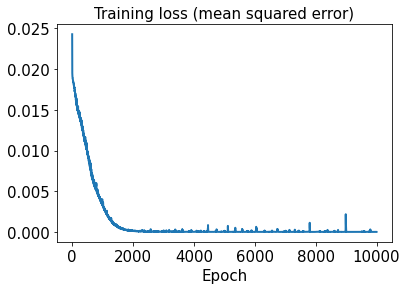

In [31]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

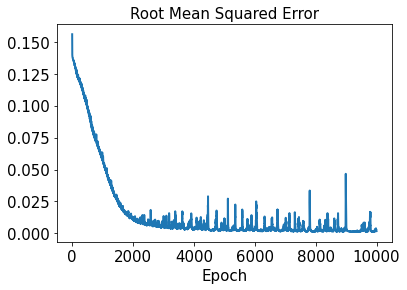

In [32]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [34]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [35]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

0.000105453415


In [36]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.05329003


In [37]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [38]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

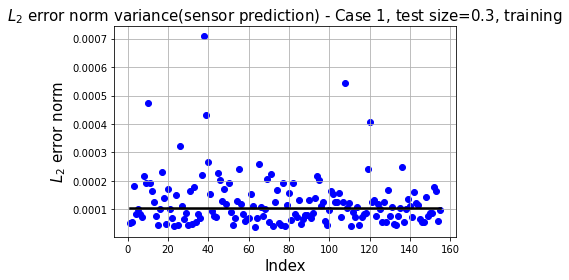

In [39]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 1, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

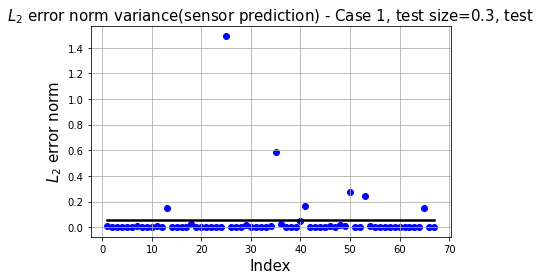

In [40]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 1, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [42]:
sd.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             5130

In [43]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [44]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
4/4 [==============================] - 0s 26ms/step - loss: 0.0110 - rmse: 0.1040
Epoch 2/10000
4/4 [==============================] - 0s 25ms/step - loss: 0.0109 - rmse: 0.1038
Epoch 3/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0109 - rmse: 0.1035
Epoch 4/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0108 - rmse: 0.1033
Epoch 5/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0108 - rmse: 0.1030
Epoch 6/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.1027
Epoch 7/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.1023
Epoch 8/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0105 - rmse: 0.1018
Epoch 9/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0104 - rmse: 0.1011
Epoch 10/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0102 - rmse: 0.1002
Epoch 11/10000
4/4 [===========================

4/4 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0653
Epoch 87/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0650
Epoch 88/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0648
Epoch 89/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0645
Epoch 90/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0643
Epoch 91/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0640
Epoch 92/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0637
Epoch 93/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0635
Epoch 94/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0632
Epoch 95/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0629
Epoch 96/10000
4/4 [==============================] - 0

4/4 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0445
Epoch 171/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0442
Epoch 172/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0440
Epoch 173/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0438
Epoch 174/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0436
Epoch 175/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0433
Epoch 176/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0432
Epoch 177/10000
4/4 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0429
Epoch 178/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0427
Epoch 179/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0425
Epoch 180/10000
4/4 [=========================

4/4 [==============================] - 0s 6ms/step - loss: 9.9759e-04 - rmse: 0.0289
Epoch 255/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.9003e-04 - rmse: 0.0287
Epoch 256/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.8245e-04 - rmse: 0.0286
Epoch 257/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.7733e-04 - rmse: 0.0285
Epoch 258/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.7172e-04 - rmse: 0.0284
Epoch 259/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6485e-04 - rmse: 0.0283
Epoch 260/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.5769e-04 - rmse: 0.0282
Epoch 261/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.5069e-04 - rmse: 0.0280
Epoch 262/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4751e-04 - rmse: 0.0280
Epoch 263/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3990e-04 - rmse: 0.0279
Epoch 

4/4 [==============================] - 0s 6ms/step - loss: 6.2620e-04 - rmse: 0.0215
Epoch 336/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.2321e-04 - rmse: 0.0214
Epoch 337/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2203e-04 - rmse: 0.0214
Epoch 338/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.1775e-04 - rmse: 0.0213
Epoch 339/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.1445e-04 - rmse: 0.0212
Epoch 340/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.1357e-04 - rmse: 0.0212
Epoch 341/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0793e-04 - rmse: 0.0211
Epoch 342/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0752e-04 - rmse: 0.0211
Epoch 343/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0381e-04 - rmse: 0.0210
Epoch 344/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0086e-04 - rmse: 0.0209
Epoch 

4/4 [==============================] - 0s 6ms/step - loss: 4.3715e-04 - rmse: 0.0166
Epoch 417/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3451e-04 - rmse: 0.0165
Epoch 418/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3264e-04 - rmse: 0.0164
Epoch 419/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3079e-04 - rmse: 0.0164
Epoch 420/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2908e-04 - rmse: 0.0163
Epoch 421/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2907e-04 - rmse: 0.0163
Epoch 422/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2621e-04 - rmse: 0.0162
Epoch 423/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2489e-04 - rmse: 0.0162
Epoch 424/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2316e-04 - rmse: 0.0161
Epoch 425/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2195e-04 - rmse: 0.0161
Epoch 

4/4 [==============================] - 0s 5ms/step - loss: 3.4710e-04 - rmse: 0.0137
Epoch 498/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4591e-04 - rmse: 0.0136
Epoch 499/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4349e-04 - rmse: 0.0135
Epoch 500/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4360e-04 - rmse: 0.0135
Epoch 501/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4351e-04 - rmse: 0.0135
Epoch 502/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4245e-04 - rmse: 0.0135
Epoch 503/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4212e-04 - rmse: 0.0135
Epoch 504/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4096e-04 - rmse: 0.0134
Epoch 505/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4062e-04 - rmse: 0.0134
Epoch 506/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3933e-04 - rmse: 0.0134
Epoch 

4/4 [==============================] - 0s 5ms/step - loss: 2.9938e-04 - rmse: 0.0119
Epoch 579/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9921e-04 - rmse: 0.0119
Epoch 580/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9875e-04 - rmse: 0.0119
Epoch 581/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9821e-04 - rmse: 0.0119
Epoch 582/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9806e-04 - rmse: 0.0119
Epoch 583/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9784e-04 - rmse: 0.0119
Epoch 584/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9694e-04 - rmse: 0.0118
Epoch 585/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9783e-04 - rmse: 0.0119
Epoch 586/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9640e-04 - rmse: 0.0118
Epoch 587/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9650e-04 - rmse: 0.0118
Epoch 

4/4 [==============================] - 0s 6ms/step - loss: 2.7110e-04 - rmse: 0.0108
Epoch 660/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7106e-04 - rmse: 0.0108
Epoch 661/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7028e-04 - rmse: 0.0108
Epoch 662/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7078e-04 - rmse: 0.0108
Epoch 663/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6995e-04 - rmse: 0.0108
Epoch 664/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6952e-04 - rmse: 0.0107
Epoch 665/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7011e-04 - rmse: 0.0108
Epoch 666/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6924e-04 - rmse: 0.0107
Epoch 667/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6962e-04 - rmse: 0.0108
Epoch 668/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6873e-04 - rmse: 0.0107
Epoch 

4/4 [==============================] - 0s 6ms/step - loss: 2.5023e-04 - rmse: 0.0100
Epoch 741/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5066e-04 - rmse: 0.0100
Epoch 742/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4940e-04 - rmse: 0.0099
Epoch 743/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4998e-04 - rmse: 0.0100
Epoch 744/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5007e-04 - rmse: 0.0100
Epoch 745/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4972e-04 - rmse: 0.0099
Epoch 746/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5004e-04 - rmse: 0.0100
Epoch 747/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4896e-04 - rmse: 0.0099
Epoch 748/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4878e-04 - rmse: 0.0099
Epoch 749/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4784e-04 - rmse: 0.0099
Epoch 

4/4 [==============================] - 0s 6ms/step - loss: 2.3165e-04 - rmse: 0.0092
Epoch 822/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3160e-04 - rmse: 0.0092
Epoch 823/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3117e-04 - rmse: 0.0091
Epoch 824/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3134e-04 - rmse: 0.0092
Epoch 825/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3104e-04 - rmse: 0.0091
Epoch 826/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3098e-04 - rmse: 0.0091
Epoch 827/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.3054e-04 - rmse: 0.0091
Epoch 828/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3044e-04 - rmse: 0.0091
Epoch 829/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2977e-04 - rmse: 0.0091
Epoch 830/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2992e-04 - rmse: 0.0091
Epoch 

4/4 [==============================] - 0s 6ms/step - loss: 2.1586e-04 - rmse: 0.0085
Epoch 903/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1594e-04 - rmse: 0.0085
Epoch 904/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1580e-04 - rmse: 0.0085
Epoch 905/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1544e-04 - rmse: 0.0084
Epoch 906/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1516e-04 - rmse: 0.0084
Epoch 907/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1500e-04 - rmse: 0.0084
Epoch 908/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1485e-04 - rmse: 0.0084
Epoch 909/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1479e-04 - rmse: 0.0084
Epoch 910/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1404e-04 - rmse: 0.0084
Epoch 911/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1419e-04 - rmse: 0.0084
Epoch 

4/4 [==============================] - 0s 6ms/step - loss: 2.0323e-04 - rmse: 0.0079
Epoch 984/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0255e-04 - rmse: 0.0078
Epoch 985/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0250e-04 - rmse: 0.0078
Epoch 986/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0202e-04 - rmse: 0.0078
Epoch 987/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0202e-04 - rmse: 0.0078
Epoch 988/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0168e-04 - rmse: 0.0078
Epoch 989/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0161e-04 - rmse: 0.0078
Epoch 990/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0165e-04 - rmse: 0.0078
Epoch 991/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0149e-04 - rmse: 0.0078
Epoch 992/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0096e-04 - rmse: 0.0078
Epoch 

4/4 [==============================] - 0s 6ms/step - loss: 1.9086e-04 - rmse: 0.0073
Epoch 1064/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9084e-04 - rmse: 0.0073
Epoch 1065/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9101e-04 - rmse: 0.0073
Epoch 1066/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9058e-04 - rmse: 0.0073
Epoch 1067/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9059e-04 - rmse: 0.0073
Epoch 1068/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9063e-04 - rmse: 0.0073
Epoch 1069/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9027e-04 - rmse: 0.0073
Epoch 1070/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9037e-04 - rmse: 0.0073
Epoch 1071/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9009e-04 - rmse: 0.0073
Epoch 1072/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9016e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.8121e-04 - rmse: 0.0068
Epoch 1144/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8118e-04 - rmse: 0.0068
Epoch 1145/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8106e-04 - rmse: 0.0068
Epoch 1146/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8147e-04 - rmse: 0.0069
Epoch 1147/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8105e-04 - rmse: 0.0068
Epoch 1148/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8084e-04 - rmse: 0.0068
Epoch 1149/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8029e-04 - rmse: 0.0068
Epoch 1150/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8035e-04 - rmse: 0.0068
Epoch 1151/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8010e-04 - rmse: 0.0068
Epoch 1152/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8008e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.7309e-04 - rmse: 0.0065
Epoch 1224/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7264e-04 - rmse: 0.0064
Epoch 1225/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7256e-04 - rmse: 0.0064
Epoch 1226/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7238e-04 - rmse: 0.0064
Epoch 1227/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7254e-04 - rmse: 0.0064
Epoch 1228/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7218e-04 - rmse: 0.0064
Epoch 1229/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7218e-04 - rmse: 0.0064
Epoch 1230/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7259e-04 - rmse: 0.0064
Epoch 1231/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7259e-04 - rmse: 0.0064
Epoch 1232/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7232e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.6531e-04 - rmse: 0.0061
Epoch 1304/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6513e-04 - rmse: 0.0061
Epoch 1305/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6519e-04 - rmse: 0.0061
Epoch 1306/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6520e-04 - rmse: 0.0061
Epoch 1307/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6479e-04 - rmse: 0.0061
Epoch 1308/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6457e-04 - rmse: 0.0060
Epoch 1309/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6437e-04 - rmse: 0.0060
Epoch 1310/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6427e-04 - rmse: 0.0060
Epoch 1311/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6404e-04 - rmse: 0.0060
Epoch 1312/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6398e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.5809e-04 - rmse: 0.0057
Epoch 1384/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5805e-04 - rmse: 0.0057
Epoch 1385/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5758e-04 - rmse: 0.0057
Epoch 1386/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5752e-04 - rmse: 0.0057
Epoch 1387/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5763e-04 - rmse: 0.0057
Epoch 1388/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5759e-04 - rmse: 0.0057
Epoch 1389/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5743e-04 - rmse: 0.0057
Epoch 1390/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5731e-04 - rmse: 0.0057
Epoch 1391/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5738e-04 - rmse: 0.0057
Epoch 1392/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5734e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.5202e-04 - rmse: 0.0055
Epoch 1464/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5193e-04 - rmse: 0.0055
Epoch 1465/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5174e-04 - rmse: 0.0055
Epoch 1466/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5190e-04 - rmse: 0.0055
Epoch 1467/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5164e-04 - rmse: 0.0055
Epoch 1468/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5209e-04 - rmse: 0.0055
Epoch 1469/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5227e-04 - rmse: 0.0055
Epoch 1470/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5203e-04 - rmse: 0.0055
Epoch 1471/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5199e-04 - rmse: 0.0055
Epoch 1472/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5152e-04 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.4602e-04 - rmse: 0.0052
Epoch 1544/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4606e-04 - rmse: 0.0052
Epoch 1545/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4581e-04 - rmse: 0.0052
Epoch 1546/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4584e-04 - rmse: 0.0052
Epoch 1547/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4553e-04 - rmse: 0.0052
Epoch 1548/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4563e-04 - rmse: 0.0052
Epoch 1549/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4544e-04 - rmse: 0.0052
Epoch 1550/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4528e-04 - rmse: 0.0052
Epoch 1551/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4544e-04 - rmse: 0.0052
Epoch 1552/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4528e-04 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.4085e-04 - rmse: 0.0050
Epoch 1624/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4074e-04 - rmse: 0.0050
Epoch 1625/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4076e-04 - rmse: 0.0050
Epoch 1626/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4064e-04 - rmse: 0.0050
Epoch 1627/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4055e-04 - rmse: 0.0050
Epoch 1628/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4049e-04 - rmse: 0.0050
Epoch 1629/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4052e-04 - rmse: 0.0050
Epoch 1630/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4059e-04 - rmse: 0.0050
Epoch 1631/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4081e-04 - rmse: 0.0050
Epoch 1632/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4055e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.3602e-04 - rmse: 0.0048
Epoch 1704/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3589e-04 - rmse: 0.0048
Epoch 1705/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3577e-04 - rmse: 0.0048
Epoch 1706/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3591e-04 - rmse: 0.0048
Epoch 1707/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3580e-04 - rmse: 0.0048
Epoch 1708/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3559e-04 - rmse: 0.0047
Epoch 1709/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3554e-04 - rmse: 0.0047
Epoch 1710/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3584e-04 - rmse: 0.0048
Epoch 1711/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3564e-04 - rmse: 0.0048
Epoch 1712/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3549e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.3184e-04 - rmse: 0.0046
Epoch 1784/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3188e-04 - rmse: 0.0046
Epoch 1785/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3157e-04 - rmse: 0.0046
Epoch 1786/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3126e-04 - rmse: 0.0046
Epoch 1787/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3118e-04 - rmse: 0.0046
Epoch 1788/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3097e-04 - rmse: 0.0045
Epoch 1789/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3100e-04 - rmse: 0.0046
Epoch 1790/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3099e-04 - rmse: 0.0046
Epoch 1791/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3084e-04 - rmse: 0.0045
Epoch 1792/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3088e-04 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.2736e-04 - rmse: 0.0044
Epoch 1864/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2739e-04 - rmse: 0.0044
Epoch 1865/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2703e-04 - rmse: 0.0044
Epoch 1866/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2689e-04 - rmse: 0.0044
Epoch 1867/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2688e-04 - rmse: 0.0044
Epoch 1868/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2675e-04 - rmse: 0.0044
Epoch 1869/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2678e-04 - rmse: 0.0044
Epoch 1870/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2674e-04 - rmse: 0.0044
Epoch 1871/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2685e-04 - rmse: 0.0044
Epoch 1872/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2688e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.2323e-04 - rmse: 0.0042
Epoch 1944/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2303e-04 - rmse: 0.0042
Epoch 1945/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2317e-04 - rmse: 0.0042
Epoch 1946/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2302e-04 - rmse: 0.0042
Epoch 1947/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2331e-04 - rmse: 0.0043
Epoch 1948/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2334e-04 - rmse: 0.0043
Epoch 1949/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2318e-04 - rmse: 0.0043
Epoch 1950/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2306e-04 - rmse: 0.0042
Epoch 1951/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2305e-04 - rmse: 0.0042
Epoch 1952/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.2295e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.1979e-04 - rmse: 0.0041
Epoch 2024/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1969e-04 - rmse: 0.0041
Epoch 2025/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1952e-04 - rmse: 0.0041
Epoch 2026/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1936e-04 - rmse: 0.0041
Epoch 2027/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1929e-04 - rmse: 0.0041
Epoch 2028/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1944e-04 - rmse: 0.0041
Epoch 2029/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1949e-04 - rmse: 0.0041
Epoch 2030/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1943e-04 - rmse: 0.0041
Epoch 2031/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1923e-04 - rmse: 0.0041
Epoch 2032/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1912e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.1647e-04 - rmse: 0.0040
Epoch 2104/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1633e-04 - rmse: 0.0040
Epoch 2105/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1624e-04 - rmse: 0.0040
Epoch 2106/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1623e-04 - rmse: 0.0040
Epoch 2107/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1614e-04 - rmse: 0.0040
Epoch 2108/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1602e-04 - rmse: 0.0040
Epoch 2109/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1596e-04 - rmse: 0.0040
Epoch 2110/10000
4/4 [==============================] - 0s 7ms/step - loss: 1.1581e-04 - rmse: 0.0040
Epoch 2111/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1576e-04 - rmse: 0.0039
Epoch 2112/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1581e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.1284e-04 - rmse: 0.0038
Epoch 2184/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1281e-04 - rmse: 0.0038
Epoch 2185/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1270e-04 - rmse: 0.0038
Epoch 2186/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1267e-04 - rmse: 0.0038
Epoch 2187/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1263e-04 - rmse: 0.0038
Epoch 2188/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1240e-04 - rmse: 0.0038
Epoch 2189/10000
4/4 [==============================] - 0s 7ms/step - loss: 1.1242e-04 - rmse: 0.0038
Epoch 2190/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1243e-04 - rmse: 0.0038
Epoch 2191/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1249e-04 - rmse: 0.0038
Epoch 2192/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1258e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.0974e-04 - rmse: 0.0037
Epoch 2264/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0967e-04 - rmse: 0.0037
Epoch 2265/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0952e-04 - rmse: 0.0037
Epoch 2266/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0946e-04 - rmse: 0.0037
Epoch 2267/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0946e-04 - rmse: 0.0037
Epoch 2268/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0939e-04 - rmse: 0.0037
Epoch 2269/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0935e-04 - rmse: 0.0037
Epoch 2270/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0929e-04 - rmse: 0.0037
Epoch 2271/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0919e-04 - rmse: 0.0037
Epoch 2272/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0922e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.0717e-04 - rmse: 0.0037
Epoch 2344/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0697e-04 - rmse: 0.0036
Epoch 2345/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0695e-04 - rmse: 0.0036
Epoch 2346/10000
4/4 [==============================] - 0s 7ms/step - loss: 1.0689e-04 - rmse: 0.0036
Epoch 2347/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0679e-04 - rmse: 0.0036
Epoch 2348/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0664e-04 - rmse: 0.0036
Epoch 2349/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0666e-04 - rmse: 0.0036
Epoch 2350/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0687e-04 - rmse: 0.0036
Epoch 2351/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0676e-04 - rmse: 0.0036
Epoch 2352/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0671e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.0405e-04 - rmse: 0.0035
Epoch 2424/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0396e-04 - rmse: 0.0035
Epoch 2425/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.0400e-04 - rmse: 0.0035
Epoch 2426/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0398e-04 - rmse: 0.0035
Epoch 2427/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0394e-04 - rmse: 0.0035
Epoch 2428/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0398e-04 - rmse: 0.0035
Epoch 2429/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0393e-04 - rmse: 0.0035
Epoch 2430/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0404e-04 - rmse: 0.0035
Epoch 2431/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0412e-04 - rmse: 0.0035
Epoch 2432/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0384e-04 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.0135e-04 - rmse: 0.0034
Epoch 2504/10000
4/4 [==============================] - 0s 7ms/step - loss: 1.0126e-04 - rmse: 0.0034
Epoch 2505/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0125e-04 - rmse: 0.0034
Epoch 2506/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0113e-04 - rmse: 0.0034
Epoch 2507/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0125e-04 - rmse: 0.0034
Epoch 2508/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0135e-04 - rmse: 0.0034
Epoch 2509/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0129e-04 - rmse: 0.0034
Epoch 2510/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0125e-04 - rmse: 0.0034
Epoch 2511/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0129e-04 - rmse: 0.0034
Epoch 2512/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0114e-04 - rmse: 0.00

4/4 [==============================] - 0s 7ms/step - loss: 9.9049e-05 - rmse: 0.0033
Epoch 2584/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.8983e-05 - rmse: 0.0033
Epoch 2585/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.8923e-05 - rmse: 0.0033
Epoch 2586/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.8939e-05 - rmse: 0.0033
Epoch 2587/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.8799e-05 - rmse: 0.0033
Epoch 2588/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.8756e-05 - rmse: 0.0033
Epoch 2589/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.8706e-05 - rmse: 0.0033
Epoch 2590/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.8810e-05 - rmse: 0.0033
Epoch 2591/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.8679e-05 - rmse: 0.0033
Epoch 2592/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.8680e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.8061e-05 - rmse: 0.0035
Epoch 2664/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.8391e-05 - rmse: 0.0035
Epoch 2665/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.7792e-05 - rmse: 0.0034
Epoch 2666/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.7203e-05 - rmse: 0.0033
Epoch 2667/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6968e-05 - rmse: 0.0033
Epoch 2668/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6957e-05 - rmse: 0.0033
Epoch 2669/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6645e-05 - rmse: 0.0033
Epoch 2670/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6447e-05 - rmse: 0.0032
Epoch 2671/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6496e-05 - rmse: 0.0033
Epoch 2672/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6480e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.4549e-05 - rmse: 0.0032
Epoch 2744/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4402e-05 - rmse: 0.0032
Epoch 2745/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4508e-05 - rmse: 0.0032
Epoch 2746/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4384e-05 - rmse: 0.0032
Epoch 2747/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.4283e-05 - rmse: 0.0032
Epoch 2748/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4468e-05 - rmse: 0.0032
Epoch 2749/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4737e-05 - rmse: 0.0032
Epoch 2750/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4520e-05 - rmse: 0.0032
Epoch 2751/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4459e-05 - rmse: 0.0032
Epoch 2752/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.4430e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.2974e-05 - rmse: 0.0032
Epoch 2824/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2612e-05 - rmse: 0.0032
Epoch 2825/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2518e-05 - rmse: 0.0032
Epoch 2826/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2637e-05 - rmse: 0.0032
Epoch 2827/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2550e-05 - rmse: 0.0032
Epoch 2828/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2582e-05 - rmse: 0.0032
Epoch 2829/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2318e-05 - rmse: 0.0031
Epoch 2830/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2127e-05 - rmse: 0.0031
Epoch 2831/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2054e-05 - rmse: 0.0031
Epoch 2832/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1925e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.0175e-05 - rmse: 0.0030
Epoch 2904/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.0054e-05 - rmse: 0.0030
Epoch 2905/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9987e-05 - rmse: 0.0030
Epoch 2906/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0106e-05 - rmse: 0.0030
Epoch 2907/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0039e-05 - rmse: 0.0030
Epoch 2908/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0032e-05 - rmse: 0.0030
Epoch 2909/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0153e-05 - rmse: 0.0031
Epoch 2910/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0393e-05 - rmse: 0.0031
Epoch 2911/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0289e-05 - rmse: 0.0031
Epoch 2912/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0393e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.8411e-05 - rmse: 0.0030
Epoch 2984/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8433e-05 - rmse: 0.0030
Epoch 2985/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8392e-05 - rmse: 0.0030
Epoch 2986/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8285e-05 - rmse: 0.0030
Epoch 2987/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8136e-05 - rmse: 0.0030
Epoch 2988/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8277e-05 - rmse: 0.0030
Epoch 2989/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8147e-05 - rmse: 0.0030
Epoch 2990/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8048e-05 - rmse: 0.0030
Epoch 2991/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8099e-05 - rmse: 0.0030
Epoch 2992/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7962e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.6361e-05 - rmse: 0.0029
Epoch 3064/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6418e-05 - rmse: 0.0029
Epoch 3065/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6193e-05 - rmse: 0.0029
Epoch 3066/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6126e-05 - rmse: 0.0029
Epoch 3067/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6279e-05 - rmse: 0.0029
Epoch 3068/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6339e-05 - rmse: 0.0029
Epoch 3069/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6368e-05 - rmse: 0.0029
Epoch 3070/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6391e-05 - rmse: 0.0030
Epoch 3071/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6352e-05 - rmse: 0.0029
Epoch 3072/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6290e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.5150e-05 - rmse: 0.0030
Epoch 3144/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5083e-05 - rmse: 0.0030
Epoch 3145/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4655e-05 - rmse: 0.0029
Epoch 3146/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4671e-05 - rmse: 0.0029
Epoch 3147/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4718e-05 - rmse: 0.0029
Epoch 3148/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4617e-05 - rmse: 0.0029
Epoch 3149/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4792e-05 - rmse: 0.0029
Epoch 3150/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4667e-05 - rmse: 0.0029
Epoch 3151/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4841e-05 - rmse: 0.0029
Epoch 3152/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4543e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.3121e-05 - rmse: 0.0029
Epoch 3224/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.3056e-05 - rmse: 0.0029
Epoch 3225/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2930e-05 - rmse: 0.0028
Epoch 3226/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2756e-05 - rmse: 0.0028
Epoch 3227/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2744e-05 - rmse: 0.0028
Epoch 3228/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2757e-05 - rmse: 0.0028
Epoch 3229/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2762e-05 - rmse: 0.0028
Epoch 3230/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2741e-05 - rmse: 0.0028
Epoch 3231/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2644e-05 - rmse: 0.0028
Epoch 3232/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2816e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.0998e-05 - rmse: 0.0027
Epoch 3304/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.1007e-05 - rmse: 0.0027
Epoch 3305/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0981e-05 - rmse: 0.0027
Epoch 3306/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0974e-05 - rmse: 0.0028
Epoch 3307/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0975e-05 - rmse: 0.0028
Epoch 3308/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0938e-05 - rmse: 0.0027
Epoch 3309/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0830e-05 - rmse: 0.0027
Epoch 3310/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0817e-05 - rmse: 0.0027
Epoch 3311/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0800e-05 - rmse: 0.0027
Epoch 3312/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0816e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.0102e-05 - rmse: 0.0028
Epoch 3384/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0398e-05 - rmse: 0.0029
Epoch 3385/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0401e-05 - rmse: 0.0029
Epoch 3386/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.9975e-05 - rmse: 0.0028
Epoch 3387/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.9893e-05 - rmse: 0.0028
Epoch 3388/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.9786e-05 - rmse: 0.0028
Epoch 3389/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.9495e-05 - rmse: 0.0027
Epoch 3390/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.9560e-05 - rmse: 0.0027
Epoch 3391/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.9504e-05 - rmse: 0.0027
Epoch 3392/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.9366e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 7.8457e-05 - rmse: 0.0028
Epoch 3464/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.8469e-05 - rmse: 0.0028
Epoch 3465/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.8408e-05 - rmse: 0.0028
Epoch 3466/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.8336e-05 - rmse: 0.0027
Epoch 3467/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.8143e-05 - rmse: 0.0027
Epoch 3468/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.7980e-05 - rmse: 0.0027
Epoch 3469/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.7979e-05 - rmse: 0.0027
Epoch 3470/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.8039e-05 - rmse: 0.0027
Epoch 3471/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.8186e-05 - rmse: 0.0027
Epoch 3472/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.8187e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 7.6421e-05 - rmse: 0.0026
Epoch 3544/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.6474e-05 - rmse: 0.0026
Epoch 3545/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.6488e-05 - rmse: 0.0026
Epoch 3546/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.6320e-05 - rmse: 0.0026
Epoch 3547/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.6313e-05 - rmse: 0.0026
Epoch 3548/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.6498e-05 - rmse: 0.0026
Epoch 3549/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.6433e-05 - rmse: 0.0026
Epoch 3550/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.6371e-05 - rmse: 0.0026
Epoch 3551/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.6412e-05 - rmse: 0.0026
Epoch 3552/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.6557e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 7.5480e-05 - rmse: 0.0027
Epoch 3624/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.5446e-05 - rmse: 0.0027
Epoch 3625/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.5338e-05 - rmse: 0.0027
Epoch 3626/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.5334e-05 - rmse: 0.0027
Epoch 3627/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.5386e-05 - rmse: 0.0027
Epoch 3628/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.5204e-05 - rmse: 0.0026
Epoch 3629/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.5096e-05 - rmse: 0.0026
Epoch 3630/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.5118e-05 - rmse: 0.0026
Epoch 3631/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.5076e-05 - rmse: 0.0026
Epoch 3632/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.4921e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 7.3946e-05 - rmse: 0.0026
Epoch 3704/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.4259e-05 - rmse: 0.0027
Epoch 3705/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.4273e-05 - rmse: 0.0027
Epoch 3706/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.4090e-05 - rmse: 0.0026
Epoch 3707/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.3880e-05 - rmse: 0.0026
Epoch 3708/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.3911e-05 - rmse: 0.0026
Epoch 3709/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.3742e-05 - rmse: 0.0026
Epoch 3710/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.3735e-05 - rmse: 0.0026
Epoch 3711/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.3642e-05 - rmse: 0.0026
Epoch 3712/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.3632e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 7.2512e-05 - rmse: 0.0025
Epoch 3784/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.2525e-05 - rmse: 0.0025
Epoch 3785/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.2492e-05 - rmse: 0.0025
Epoch 3786/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.2487e-05 - rmse: 0.0025
Epoch 3787/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.2446e-05 - rmse: 0.0025
Epoch 3788/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.2466e-05 - rmse: 0.0025
Epoch 3789/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.2511e-05 - rmse: 0.0026
Epoch 3790/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.2660e-05 - rmse: 0.0026
Epoch 3791/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.2506e-05 - rmse: 0.0026
Epoch 3792/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.2385e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 7.1215e-05 - rmse: 0.0025
Epoch 3864/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.1132e-05 - rmse: 0.0025
Epoch 3865/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.1216e-05 - rmse: 0.0025
Epoch 3866/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.1366e-05 - rmse: 0.0025
Epoch 3867/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.1433e-05 - rmse: 0.0026
Epoch 3868/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.1282e-05 - rmse: 0.0025
Epoch 3869/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.1399e-05 - rmse: 0.0026
Epoch 3870/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.1413e-05 - rmse: 0.0026
Epoch 3871/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.1300e-05 - rmse: 0.0025
Epoch 3872/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.1415e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 7.0233e-05 - rmse: 0.0025
Epoch 3944/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.0184e-05 - rmse: 0.0025
Epoch 3945/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.0037e-05 - rmse: 0.0025
Epoch 3946/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.0000e-05 - rmse: 0.0025
Epoch 3947/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.9880e-05 - rmse: 0.0025
Epoch 3948/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.9963e-05 - rmse: 0.0025
Epoch 3949/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.9903e-05 - rmse: 0.0025
Epoch 3950/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.9882e-05 - rmse: 0.0025
Epoch 3951/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.9920e-05 - rmse: 0.0025
Epoch 3952/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.9861e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.8973e-05 - rmse: 0.0025
Epoch 4024/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.9112e-05 - rmse: 0.0025
Epoch 4025/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.8962e-05 - rmse: 0.0025
Epoch 4026/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.8878e-05 - rmse: 0.0025
Epoch 4027/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.8916e-05 - rmse: 0.0025
Epoch 4028/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.8821e-05 - rmse: 0.0024
Epoch 4029/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.9011e-05 - rmse: 0.0025
Epoch 4030/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.8835e-05 - rmse: 0.0025
Epoch 4031/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.8751e-05 - rmse: 0.0024
Epoch 4032/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.8669e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.7903e-05 - rmse: 0.0024
Epoch 4104/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7771e-05 - rmse: 0.0024
Epoch 4105/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7823e-05 - rmse: 0.0024
Epoch 4106/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7809e-05 - rmse: 0.0024
Epoch 4107/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7712e-05 - rmse: 0.0024
Epoch 4108/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7755e-05 - rmse: 0.0024
Epoch 4109/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7636e-05 - rmse: 0.0024
Epoch 4110/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.7669e-05 - rmse: 0.0024
Epoch 4111/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7572e-05 - rmse: 0.0024
Epoch 4112/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7578e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.7059e-05 - rmse: 0.0025
Epoch 4184/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7445e-05 - rmse: 0.0026
Epoch 4185/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.7270e-05 - rmse: 0.0025
Epoch 4186/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7430e-05 - rmse: 0.0026
Epoch 4187/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7594e-05 - rmse: 0.0026
Epoch 4188/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7393e-05 - rmse: 0.0026
Epoch 4189/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7704e-05 - rmse: 0.0026
Epoch 4190/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7280e-05 - rmse: 0.0025
Epoch 4191/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7378e-05 - rmse: 0.0026
Epoch 4192/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7140e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.5441e-05 - rmse: 0.0023
Epoch 4264/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.5372e-05 - rmse: 0.0023
Epoch 4265/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.5496e-05 - rmse: 0.0023
Epoch 4266/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.5478e-05 - rmse: 0.0023
Epoch 4267/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.5422e-05 - rmse: 0.0023
Epoch 4268/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.5475e-05 - rmse: 0.0023
Epoch 4269/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.5504e-05 - rmse: 0.0024
Epoch 4270/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.5643e-05 - rmse: 0.0024
Epoch 4271/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.5548e-05 - rmse: 0.0024
Epoch 4272/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.5454e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.4666e-05 - rmse: 0.0024
Epoch 4344/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.4529e-05 - rmse: 0.0023
Epoch 4345/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.4498e-05 - rmse: 0.0023
Epoch 4346/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.4616e-05 - rmse: 0.0024
Epoch 4347/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.4563e-05 - rmse: 0.0023
Epoch 4348/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.4592e-05 - rmse: 0.0024
Epoch 4349/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.4733e-05 - rmse: 0.0024
Epoch 4350/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.4623e-05 - rmse: 0.0024
Epoch 4351/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.4527e-05 - rmse: 0.0023
Epoch 4352/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.4768e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.3720e-05 - rmse: 0.0023
Epoch 4424/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.3776e-05 - rmse: 0.0024
Epoch 4425/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.3949e-05 - rmse: 0.0024
Epoch 4426/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.4006e-05 - rmse: 0.0024
Epoch 4427/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.3922e-05 - rmse: 0.0024
Epoch 4428/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.3778e-05 - rmse: 0.0024
Epoch 4429/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.3841e-05 - rmse: 0.0024
Epoch 4430/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.3781e-05 - rmse: 0.0024
Epoch 4431/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.3800e-05 - rmse: 0.0024
Epoch 4432/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.4126e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.2463e-05 - rmse: 0.0023
Epoch 4504/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2515e-05 - rmse: 0.0023
Epoch 4505/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2590e-05 - rmse: 0.0023
Epoch 4506/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2717e-05 - rmse: 0.0023
Epoch 4507/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2552e-05 - rmse: 0.0023
Epoch 4508/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2460e-05 - rmse: 0.0023
Epoch 4509/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2494e-05 - rmse: 0.0023
Epoch 4510/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2393e-05 - rmse: 0.0023
Epoch 4511/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2411e-05 - rmse: 0.0023
Epoch 4512/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2566e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.1603e-05 - rmse: 0.0022
Epoch 4584/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.1624e-05 - rmse: 0.0023
Epoch 4585/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.1678e-05 - rmse: 0.0023
Epoch 4586/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.1772e-05 - rmse: 0.0023
Epoch 4587/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.1737e-05 - rmse: 0.0023
Epoch 4588/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.1636e-05 - rmse: 0.0023
Epoch 4589/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.1620e-05 - rmse: 0.0023
Epoch 4590/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.1593e-05 - rmse: 0.0023
Epoch 4591/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.1736e-05 - rmse: 0.0023
Epoch 4592/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.1538e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.0656e-05 - rmse: 0.0022
Epoch 4664/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0732e-05 - rmse: 0.0022
Epoch 4665/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0727e-05 - rmse: 0.0022
Epoch 4666/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0780e-05 - rmse: 0.0022
Epoch 4667/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0891e-05 - rmse: 0.0023
Epoch 4668/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.1031e-05 - rmse: 0.0023
Epoch 4669/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0945e-05 - rmse: 0.0023
Epoch 4670/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0922e-05 - rmse: 0.0023
Epoch 4671/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0694e-05 - rmse: 0.0022
Epoch 4672/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0817e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.9949e-05 - rmse: 0.0022
Epoch 4744/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.9897e-05 - rmse: 0.0022
Epoch 4745/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.9891e-05 - rmse: 0.0022
Epoch 4746/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.9913e-05 - rmse: 0.0022
Epoch 4747/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0161e-05 - rmse: 0.0023
Epoch 4748/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0093e-05 - rmse: 0.0023
Epoch 4749/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0168e-05 - rmse: 0.0023
Epoch 4750/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.0169e-05 - rmse: 0.0023
Epoch 4751/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.9930e-05 - rmse: 0.0022
Epoch 4752/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.9800e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.9065e-05 - rmse: 0.0022
Epoch 4824/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.9038e-05 - rmse: 0.0022
Epoch 4825/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.9035e-05 - rmse: 0.0022
Epoch 4826/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8950e-05 - rmse: 0.0022
Epoch 4827/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.8915e-05 - rmse: 0.0022
Epoch 4828/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8807e-05 - rmse: 0.0021
Epoch 4829/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8848e-05 - rmse: 0.0022
Epoch 4830/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8818e-05 - rmse: 0.0022
Epoch 4831/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.8985e-05 - rmse: 0.0022
Epoch 4832/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8979e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.8586e-05 - rmse: 0.0023
Epoch 4904/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.8542e-05 - rmse: 0.0022
Epoch 4905/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8443e-05 - rmse: 0.0022
Epoch 4906/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8414e-05 - rmse: 0.0022
Epoch 4907/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8300e-05 - rmse: 0.0022
Epoch 4908/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8236e-05 - rmse: 0.0022
Epoch 4909/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8134e-05 - rmse: 0.0022
Epoch 4910/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8175e-05 - rmse: 0.0022
Epoch 4911/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8196e-05 - rmse: 0.0022
Epoch 4912/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8030e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.7330e-05 - rmse: 0.0021
Epoch 4984/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.7259e-05 - rmse: 0.0021
Epoch 4985/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.7241e-05 - rmse: 0.0021
Epoch 4986/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.7286e-05 - rmse: 0.0021
Epoch 4987/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.7382e-05 - rmse: 0.0021
Epoch 4988/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.7440e-05 - rmse: 0.0022
Epoch 4989/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.7368e-05 - rmse: 0.0021
Epoch 4990/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.7397e-05 - rmse: 0.0022
Epoch 4991/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.7331e-05 - rmse: 0.0021
Epoch 4992/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.7417e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.6572e-05 - rmse: 0.0021
Epoch 5064/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6619e-05 - rmse: 0.0021
Epoch 5065/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6539e-05 - rmse: 0.0021
Epoch 5066/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6542e-05 - rmse: 0.0021
Epoch 5067/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6539e-05 - rmse: 0.0021
Epoch 5068/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6553e-05 - rmse: 0.0021
Epoch 5069/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6726e-05 - rmse: 0.0022
Epoch 5070/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6793e-05 - rmse: 0.0022
Epoch 5071/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6677e-05 - rmse: 0.0021
Epoch 5072/10000
4/4 [==============================] - 0s 7ms/step - loss: 5.6612e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.6004e-05 - rmse: 0.0021
Epoch 5144/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5957e-05 - rmse: 0.0021
Epoch 5145/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5947e-05 - rmse: 0.0021
Epoch 5146/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5793e-05 - rmse: 0.0021
Epoch 5147/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5834e-05 - rmse: 0.0021
Epoch 5148/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5759e-05 - rmse: 0.0021
Epoch 5149/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5733e-05 - rmse: 0.0021
Epoch 5150/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5781e-05 - rmse: 0.0021
Epoch 5151/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5834e-05 - rmse: 0.0021
Epoch 5152/10000
4/4 [==============================] - 0s 8ms/step - loss: 5.6003e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 5.5233e-05 - rmse: 0.0021
Epoch 5224/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5193e-05 - rmse: 0.0021
Epoch 5225/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5145e-05 - rmse: 0.0021
Epoch 5226/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5217e-05 - rmse: 0.0021
Epoch 5227/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5246e-05 - rmse: 0.0021
Epoch 5228/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5207e-05 - rmse: 0.0021
Epoch 5229/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5347e-05 - rmse: 0.0021
Epoch 5230/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5472e-05 - rmse: 0.0022
Epoch 5231/10000
4/4 [==============================] - 0s 8ms/step - loss: 5.5637e-05 - rmse: 0.0022
Epoch 5232/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5332e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.4407e-05 - rmse: 0.0021
Epoch 5304/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.4336e-05 - rmse: 0.0020
Epoch 5305/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.4405e-05 - rmse: 0.0021
Epoch 5306/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.4417e-05 - rmse: 0.0021
Epoch 5307/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.4435e-05 - rmse: 0.0021
Epoch 5308/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.4529e-05 - rmse: 0.0021
Epoch 5309/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.4650e-05 - rmse: 0.0021
Epoch 5310/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.4768e-05 - rmse: 0.0022
Epoch 5311/10000
4/4 [==============================] - 0s 8ms/step - loss: 5.5470e-05 - rmse: 0.0023
Epoch 5312/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5600e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.3687e-05 - rmse: 0.0020
Epoch 5384/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3711e-05 - rmse: 0.0020
Epoch 5385/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3689e-05 - rmse: 0.0020
Epoch 5386/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3693e-05 - rmse: 0.0020
Epoch 5387/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3714e-05 - rmse: 0.0020
Epoch 5388/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3663e-05 - rmse: 0.0020
Epoch 5389/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3732e-05 - rmse: 0.0021
Epoch 5390/10000
4/4 [==============================] - 0s 8ms/step - loss: 5.3687e-05 - rmse: 0.0020
Epoch 5391/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3689e-05 - rmse: 0.0021
Epoch 5392/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.3723e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.3777e-05 - rmse: 0.0022
Epoch 5464/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3973e-05 - rmse: 0.0022
Epoch 5465/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.3871e-05 - rmse: 0.0022
Epoch 5466/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3857e-05 - rmse: 0.0022
Epoch 5467/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.3946e-05 - rmse: 0.0022
Epoch 5468/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3559e-05 - rmse: 0.0022
Epoch 5469/10000
4/4 [==============================] - 0s 8ms/step - loss: 5.3877e-05 - rmse: 0.0022
Epoch 5470/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3843e-05 - rmse: 0.0022
Epoch 5471/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3733e-05 - rmse: 0.0022
Epoch 5472/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3931e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.2685e-05 - rmse: 0.0021
Epoch 5544/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2810e-05 - rmse: 0.0021
Epoch 5545/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3379e-05 - rmse: 0.0022
Epoch 5546/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2890e-05 - rmse: 0.0021
Epoch 5547/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2854e-05 - rmse: 0.0021
Epoch 5548/10000
4/4 [==============================] - 0s 7ms/step - loss: 5.2728e-05 - rmse: 0.0021
Epoch 5549/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2706e-05 - rmse: 0.0021
Epoch 5550/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2633e-05 - rmse: 0.0021
Epoch 5551/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2588e-05 - rmse: 0.0021
Epoch 5552/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2455e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.1999e-05 - rmse: 0.0021
Epoch 5624/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1933e-05 - rmse: 0.0020
Epoch 5625/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1981e-05 - rmse: 0.0020
Epoch 5626/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1920e-05 - rmse: 0.0020
Epoch 5627/10000
4/4 [==============================] - 0s 7ms/step - loss: 5.1813e-05 - rmse: 0.0020
Epoch 5628/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.1742e-05 - rmse: 0.0020
Epoch 5629/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1755e-05 - rmse: 0.0020
Epoch 5630/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1905e-05 - rmse: 0.0020
Epoch 5631/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1884e-05 - rmse: 0.0020
Epoch 5632/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1804e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.1397e-05 - rmse: 0.0020
Epoch 5704/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1281e-05 - rmse: 0.0020
Epoch 5705/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1302e-05 - rmse: 0.0020
Epoch 5706/10000
4/4 [==============================] - 0s 7ms/step - loss: 5.1409e-05 - rmse: 0.0020
Epoch 5707/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1422e-05 - rmse: 0.0020
Epoch 5708/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1477e-05 - rmse: 0.0021
Epoch 5709/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1349e-05 - rmse: 0.0020
Epoch 5710/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1261e-05 - rmse: 0.0020
Epoch 5711/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1207e-05 - rmse: 0.0020
Epoch 5712/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1189e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.0707e-05 - rmse: 0.0020
Epoch 5784/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.0763e-05 - rmse: 0.0020
Epoch 5785/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0870e-05 - rmse: 0.0020
Epoch 5786/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1085e-05 - rmse: 0.0021
Epoch 5787/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0941e-05 - rmse: 0.0021
Epoch 5788/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0891e-05 - rmse: 0.0021
Epoch 5789/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0847e-05 - rmse: 0.0020
Epoch 5790/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0718e-05 - rmse: 0.0020
Epoch 5791/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.0667e-05 - rmse: 0.0020
Epoch 5792/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0698e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.0082e-05 - rmse: 0.0020
Epoch 5864/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0107e-05 - rmse: 0.0020
Epoch 5865/10000
4/4 [==============================] - 0s 8ms/step - loss: 5.0000e-05 - rmse: 0.0020
Epoch 5866/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9974e-05 - rmse: 0.0019
Epoch 5867/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9961e-05 - rmse: 0.0019
Epoch 5868/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0032e-05 - rmse: 0.0020
Epoch 5869/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0118e-05 - rmse: 0.0020
Epoch 5870/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0084e-05 - rmse: 0.0020
Epoch 5871/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0414e-05 - rmse: 0.0021
Epoch 5872/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0205e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.9385e-05 - rmse: 0.0019
Epoch 5944/10000
4/4 [==============================] - 0s 8ms/step - loss: 4.9470e-05 - rmse: 0.0019
Epoch 5945/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9449e-05 - rmse: 0.0019
Epoch 5946/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9469e-05 - rmse: 0.0019
Epoch 5947/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9446e-05 - rmse: 0.0019
Epoch 5948/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9616e-05 - rmse: 0.0020
Epoch 5949/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9496e-05 - rmse: 0.0020
Epoch 5950/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9412e-05 - rmse: 0.0019
Epoch 5951/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9398e-05 - rmse: 0.0019
Epoch 5952/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9543e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.9250e-05 - rmse: 0.0020
Epoch 6024/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9219e-05 - rmse: 0.0020
Epoch 6025/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9394e-05 - rmse: 0.0021
Epoch 6026/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.9313e-05 - rmse: 0.0020
Epoch 6027/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9303e-05 - rmse: 0.0020
Epoch 6028/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9233e-05 - rmse: 0.0020
Epoch 6029/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9065e-05 - rmse: 0.0020
Epoch 6030/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9148e-05 - rmse: 0.0020
Epoch 6031/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9084e-05 - rmse: 0.0020
Epoch 6032/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9100e-05 - rmse: 0.00

4/4 [==============================] - 0s 7ms/step - loss: 4.9184e-05 - rmse: 0.0021
Epoch 6104/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.8994e-05 - rmse: 0.0021
Epoch 6105/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.8685e-05 - rmse: 0.0020
Epoch 6106/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.8850e-05 - rmse: 0.0020
Epoch 6107/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.8820e-05 - rmse: 0.0020
Epoch 6108/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9586e-05 - rmse: 0.0022
Epoch 6109/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0292e-05 - rmse: 0.0024
Epoch 6110/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0722e-05 - rmse: 0.0025
Epoch 6111/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0877e-05 - rmse: 0.0025
Epoch 6112/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9884e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.7940e-05 - rmse: 0.0019
Epoch 6184/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7808e-05 - rmse: 0.0019
Epoch 6185/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7688e-05 - rmse: 0.0019
Epoch 6186/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7733e-05 - rmse: 0.0019
Epoch 6187/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7782e-05 - rmse: 0.0019
Epoch 6188/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7934e-05 - rmse: 0.0019
Epoch 6189/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7762e-05 - rmse: 0.0019
Epoch 6190/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7777e-05 - rmse: 0.0019
Epoch 6191/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7708e-05 - rmse: 0.0019
Epoch 6192/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7663e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.7428e-05 - rmse: 0.0019
Epoch 6264/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7397e-05 - rmse: 0.0019
Epoch 6265/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7390e-05 - rmse: 0.0019
Epoch 6266/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7532e-05 - rmse: 0.0019
Epoch 6267/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7712e-05 - rmse: 0.0020
Epoch 6268/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7605e-05 - rmse: 0.0020
Epoch 6269/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7583e-05 - rmse: 0.0020
Epoch 6270/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7649e-05 - rmse: 0.0020
Epoch 6271/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7529e-05 - rmse: 0.0019
Epoch 6272/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7405e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.6926e-05 - rmse: 0.0019
Epoch 6344/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6801e-05 - rmse: 0.0019
Epoch 6345/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6795e-05 - rmse: 0.0019
Epoch 6346/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6909e-05 - rmse: 0.0019
Epoch 6347/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7122e-05 - rmse: 0.0019
Epoch 6348/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7206e-05 - rmse: 0.0020
Epoch 6349/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7100e-05 - rmse: 0.0019
Epoch 6350/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7105e-05 - rmse: 0.0019
Epoch 6351/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7112e-05 - rmse: 0.0019
Epoch 6352/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7073e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.6477e-05 - rmse: 0.0019
Epoch 6424/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6503e-05 - rmse: 0.0019
Epoch 6425/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6568e-05 - rmse: 0.0019
Epoch 6426/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6449e-05 - rmse: 0.0019
Epoch 6427/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6447e-05 - rmse: 0.0019
Epoch 6428/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6440e-05 - rmse: 0.0019
Epoch 6429/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6426e-05 - rmse: 0.0019
Epoch 6430/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6406e-05 - rmse: 0.0019
Epoch 6431/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6490e-05 - rmse: 0.0019
Epoch 6432/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6449e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.5997e-05 - rmse: 0.0019
Epoch 6504/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5954e-05 - rmse: 0.0019
Epoch 6505/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5933e-05 - rmse: 0.0019
Epoch 6506/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5993e-05 - rmse: 0.0019
Epoch 6507/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5928e-05 - rmse: 0.0019
Epoch 6508/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5870e-05 - rmse: 0.0018
Epoch 6509/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5822e-05 - rmse: 0.0018
Epoch 6510/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5832e-05 - rmse: 0.0018
Epoch 6511/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5770e-05 - rmse: 0.0018
Epoch 6512/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5806e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.5474e-05 - rmse: 0.0018
Epoch 6584/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5735e-05 - rmse: 0.0019
Epoch 6585/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5850e-05 - rmse: 0.0019
Epoch 6586/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5895e-05 - rmse: 0.0020
Epoch 6587/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5787e-05 - rmse: 0.0019
Epoch 6588/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5825e-05 - rmse: 0.0019
Epoch 6589/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5665e-05 - rmse: 0.0019
Epoch 6590/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5651e-05 - rmse: 0.0019
Epoch 6591/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5765e-05 - rmse: 0.0019
Epoch 6592/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5557e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.5274e-05 - rmse: 0.0019
Epoch 6664/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5391e-05 - rmse: 0.0019
Epoch 6665/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5312e-05 - rmse: 0.0019
Epoch 6666/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5593e-05 - rmse: 0.0020
Epoch 6667/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5322e-05 - rmse: 0.0019
Epoch 6668/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5217e-05 - rmse: 0.0019
Epoch 6669/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5445e-05 - rmse: 0.0019
Epoch 6670/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5354e-05 - rmse: 0.0019
Epoch 6671/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5110e-05 - rmse: 0.0019
Epoch 6672/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4937e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.4560e-05 - rmse: 0.0018
Epoch 6744/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4610e-05 - rmse: 0.0018
Epoch 6745/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4653e-05 - rmse: 0.0018
Epoch 6746/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4590e-05 - rmse: 0.0018
Epoch 6747/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4746e-05 - rmse: 0.0019
Epoch 6748/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4628e-05 - rmse: 0.0018
Epoch 6749/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4583e-05 - rmse: 0.0018
Epoch 6750/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4581e-05 - rmse: 0.0018
Epoch 6751/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4513e-05 - rmse: 0.0018
Epoch 6752/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4510e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.5184e-05 - rmse: 0.0021
Epoch 6824/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5081e-05 - rmse: 0.0020
Epoch 6825/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5118e-05 - rmse: 0.0020
Epoch 6826/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4794e-05 - rmse: 0.0020
Epoch 6827/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4933e-05 - rmse: 0.0020
Epoch 6828/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4604e-05 - rmse: 0.0019
Epoch 6829/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4600e-05 - rmse: 0.0019
Epoch 6830/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4410e-05 - rmse: 0.0019
Epoch 6831/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4386e-05 - rmse: 0.0019
Epoch 6832/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4378e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.3986e-05 - rmse: 0.0019
Epoch 6904/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3991e-05 - rmse: 0.0019
Epoch 6905/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3936e-05 - rmse: 0.0018
Epoch 6906/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3870e-05 - rmse: 0.0018
Epoch 6907/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3912e-05 - rmse: 0.0018
Epoch 6908/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3882e-05 - rmse: 0.0018
Epoch 6909/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3802e-05 - rmse: 0.0018
Epoch 6910/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3758e-05 - rmse: 0.0018
Epoch 6911/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3787e-05 - rmse: 0.0018
Epoch 6912/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3794e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.3468e-05 - rmse: 0.0018
Epoch 6984/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3346e-05 - rmse: 0.0018
Epoch 6985/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3321e-05 - rmse: 0.0018
Epoch 6986/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3378e-05 - rmse: 0.0018
Epoch 6987/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3410e-05 - rmse: 0.0018
Epoch 6988/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3505e-05 - rmse: 0.0018
Epoch 6989/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3424e-05 - rmse: 0.0018
Epoch 6990/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3366e-05 - rmse: 0.0018
Epoch 6991/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3611e-05 - rmse: 0.0019
Epoch 6992/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3526e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.2951e-05 - rmse: 0.0018
Epoch 7064/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2927e-05 - rmse: 0.0018
Epoch 7065/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2894e-05 - rmse: 0.0018
Epoch 7066/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3008e-05 - rmse: 0.0018
Epoch 7067/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3289e-05 - rmse: 0.0019
Epoch 7068/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3104e-05 - rmse: 0.0018
Epoch 7069/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3216e-05 - rmse: 0.0018
Epoch 7070/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3398e-05 - rmse: 0.0019
Epoch 7071/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3430e-05 - rmse: 0.0019
Epoch 7072/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3241e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.2661e-05 - rmse: 0.0018
Epoch 7144/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2664e-05 - rmse: 0.0018
Epoch 7145/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2609e-05 - rmse: 0.0018
Epoch 7146/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2632e-05 - rmse: 0.0018
Epoch 7147/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2632e-05 - rmse: 0.0018
Epoch 7148/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2571e-05 - rmse: 0.0018
Epoch 7149/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2540e-05 - rmse: 0.0018
Epoch 7150/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2491e-05 - rmse: 0.0017
Epoch 7151/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2570e-05 - rmse: 0.0018
Epoch 7152/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2561e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.2754e-05 - rmse: 0.0019
Epoch 7224/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2608e-05 - rmse: 0.0019
Epoch 7225/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2700e-05 - rmse: 0.0019
Epoch 7226/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2909e-05 - rmse: 0.0019
Epoch 7227/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2844e-05 - rmse: 0.0019
Epoch 7228/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2490e-05 - rmse: 0.0018
Epoch 7229/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2625e-05 - rmse: 0.0019
Epoch 7230/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2641e-05 - rmse: 0.0019
Epoch 7231/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2621e-05 - rmse: 0.0019
Epoch 7232/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2410e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.1696e-05 - rmse: 0.0017
Epoch 7304/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1705e-05 - rmse: 0.0017
Epoch 7305/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1740e-05 - rmse: 0.0017
Epoch 7306/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1701e-05 - rmse: 0.0017
Epoch 7307/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1707e-05 - rmse: 0.0017
Epoch 7308/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1771e-05 - rmse: 0.0017
Epoch 7309/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1813e-05 - rmse: 0.0017
Epoch 7310/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1857e-05 - rmse: 0.0017
Epoch 7311/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1828e-05 - rmse: 0.0017
Epoch 7312/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1936e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.1519e-05 - rmse: 0.0017
Epoch 7384/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1522e-05 - rmse: 0.0017
Epoch 7385/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1541e-05 - rmse: 0.0017
Epoch 7386/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1464e-05 - rmse: 0.0017
Epoch 7387/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1572e-05 - rmse: 0.0018
Epoch 7388/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1709e-05 - rmse: 0.0018
Epoch 7389/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1690e-05 - rmse: 0.0018
Epoch 7390/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1720e-05 - rmse: 0.0018
Epoch 7391/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1741e-05 - rmse: 0.0018
Epoch 7392/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1746e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.1062e-05 - rmse: 0.0017
Epoch 7464/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1019e-05 - rmse: 0.0017
Epoch 7465/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1009e-05 - rmse: 0.0017
Epoch 7466/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0998e-05 - rmse: 0.0017
Epoch 7467/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1017e-05 - rmse: 0.0017
Epoch 7468/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1061e-05 - rmse: 0.0017
Epoch 7469/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1210e-05 - rmse: 0.0017
Epoch 7470/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1209e-05 - rmse: 0.0017
Epoch 7471/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1165e-05 - rmse: 0.0017
Epoch 7472/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1186e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.1100e-05 - rmse: 0.0018
Epoch 7544/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1389e-05 - rmse: 0.0019
Epoch 7545/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1356e-05 - rmse: 0.0019
Epoch 7546/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1111e-05 - rmse: 0.0018
Epoch 7547/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1033e-05 - rmse: 0.0018
Epoch 7548/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0934e-05 - rmse: 0.0017
Epoch 7549/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0910e-05 - rmse: 0.0017
Epoch 7550/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0884e-05 - rmse: 0.0017
Epoch 7551/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0782e-05 - rmse: 0.0017
Epoch 7552/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0906e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.0392e-05 - rmse: 0.0017
Epoch 7624/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0524e-05 - rmse: 0.0017
Epoch 7625/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0448e-05 - rmse: 0.0017
Epoch 7626/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0537e-05 - rmse: 0.0017
Epoch 7627/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0514e-05 - rmse: 0.0017
Epoch 7628/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0451e-05 - rmse: 0.0017
Epoch 7629/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0434e-05 - rmse: 0.0017
Epoch 7630/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0404e-05 - rmse: 0.0017
Epoch 7631/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0394e-05 - rmse: 0.0017
Epoch 7632/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.0416e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.0192e-05 - rmse: 0.0017
Epoch 7704/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0149e-05 - rmse: 0.0017
Epoch 7705/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0091e-05 - rmse: 0.0017
Epoch 7706/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0125e-05 - rmse: 0.0017
Epoch 7707/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0197e-05 - rmse: 0.0017
Epoch 7708/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0283e-05 - rmse: 0.0017
Epoch 7709/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0208e-05 - rmse: 0.0017
Epoch 7710/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0164e-05 - rmse: 0.0017
Epoch 7711/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0114e-05 - rmse: 0.0017
Epoch 7712/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0116e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.0007e-05 - rmse: 0.0017
Epoch 7784/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9997e-05 - rmse: 0.0017
Epoch 7785/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9909e-05 - rmse: 0.0017
Epoch 7786/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9857e-05 - rmse: 0.0017
Epoch 7787/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9789e-05 - rmse: 0.0017
Epoch 7788/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9782e-05 - rmse: 0.0017
Epoch 7789/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9849e-05 - rmse: 0.0017
Epoch 7790/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9934e-05 - rmse: 0.0017
Epoch 7791/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9898e-05 - rmse: 0.0017
Epoch 7792/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9867e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.9529e-05 - rmse: 0.0017
Epoch 7864/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9507e-05 - rmse: 0.0017
Epoch 7865/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9453e-05 - rmse: 0.0016
Epoch 7866/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9406e-05 - rmse: 0.0016
Epoch 7867/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9468e-05 - rmse: 0.0016
Epoch 7868/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9509e-05 - rmse: 0.0017
Epoch 7869/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9473e-05 - rmse: 0.0017
Epoch 7870/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9553e-05 - rmse: 0.0017
Epoch 7871/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9472e-05 - rmse: 0.0017
Epoch 7872/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9480e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.9588e-05 - rmse: 0.0018
Epoch 7944/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9730e-05 - rmse: 0.0018
Epoch 7945/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.9602e-05 - rmse: 0.0018
Epoch 7946/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9731e-05 - rmse: 0.0018
Epoch 7947/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.9598e-05 - rmse: 0.0018
Epoch 7948/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9494e-05 - rmse: 0.0017
Epoch 7949/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9410e-05 - rmse: 0.0017
Epoch 7950/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9325e-05 - rmse: 0.0017
Epoch 7951/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.9380e-05 - rmse: 0.0017
Epoch 7952/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9320e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 3.9064e-05 - rmse: 0.0017
Epoch 8024/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9218e-05 - rmse: 0.0017
Epoch 8025/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9252e-05 - rmse: 0.0017
Epoch 8026/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9171e-05 - rmse: 0.0017
Epoch 8027/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.9342e-05 - rmse: 0.0018
Epoch 8028/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9350e-05 - rmse: 0.0018
Epoch 8029/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9311e-05 - rmse: 0.0018
Epoch 8030/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9344e-05 - rmse: 0.0018
Epoch 8031/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9230e-05 - rmse: 0.0017
Epoch 8032/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9269e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 3.8957e-05 - rmse: 0.0017
Epoch 8104/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8949e-05 - rmse: 0.0017
Epoch 8105/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.9118e-05 - rmse: 0.0018
Epoch 8106/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9140e-05 - rmse: 0.0018
Epoch 8107/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8961e-05 - rmse: 0.0017
Epoch 8108/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8944e-05 - rmse: 0.0017
Epoch 8109/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.9048e-05 - rmse: 0.0018
Epoch 8110/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9029e-05 - rmse: 0.0018
Epoch 8111/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8922e-05 - rmse: 0.0017
Epoch 8112/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8946e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 3.8395e-05 - rmse: 0.0016
Epoch 8184/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8356e-05 - rmse: 0.0016
Epoch 8185/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8353e-05 - rmse: 0.0016
Epoch 8186/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8489e-05 - rmse: 0.0017
Epoch 8187/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.8440e-05 - rmse: 0.0017
Epoch 8188/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8446e-05 - rmse: 0.0017
Epoch 8189/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8428e-05 - rmse: 0.0017
Epoch 8190/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8403e-05 - rmse: 0.0017
Epoch 8191/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8401e-05 - rmse: 0.0017
Epoch 8192/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8418e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.8225e-05 - rmse: 0.0017
Epoch 8264/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8166e-05 - rmse: 0.0016
Epoch 8265/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8120e-05 - rmse: 0.0016
Epoch 8266/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8036e-05 - rmse: 0.0016
Epoch 8267/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.8021e-05 - rmse: 0.0016
Epoch 8268/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8017e-05 - rmse: 0.0016
Epoch 8269/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7977e-05 - rmse: 0.0016
Epoch 8270/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7947e-05 - rmse: 0.0016
Epoch 8271/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7996e-05 - rmse: 0.0016
Epoch 8272/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8058e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.7892e-05 - rmse: 0.0016
Epoch 8344/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.7880e-05 - rmse: 0.0016
Epoch 8345/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7942e-05 - rmse: 0.0017
Epoch 8346/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.7934e-05 - rmse: 0.0017
Epoch 8347/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7957e-05 - rmse: 0.0017
Epoch 8348/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7927e-05 - rmse: 0.0017
Epoch 8349/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7856e-05 - rmse: 0.0016
Epoch 8350/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7809e-05 - rmse: 0.0016
Epoch 8351/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7811e-05 - rmse: 0.0016
Epoch 8352/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7801e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.8044e-05 - rmse: 0.0018
Epoch 8424/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8247e-05 - rmse: 0.0018
Epoch 8425/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8083e-05 - rmse: 0.0018
Epoch 8426/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8129e-05 - rmse: 0.0018
Epoch 8427/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8237e-05 - rmse: 0.0018
Epoch 8428/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8161e-05 - rmse: 0.0018
Epoch 8429/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8140e-05 - rmse: 0.0018
Epoch 8430/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8065e-05 - rmse: 0.0018
Epoch 8431/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8453e-05 - rmse: 0.0019
Epoch 8432/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8190e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.7520e-05 - rmse: 0.0017
Epoch 8504/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7396e-05 - rmse: 0.0016
Epoch 8505/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7355e-05 - rmse: 0.0016
Epoch 8506/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7361e-05 - rmse: 0.0016
Epoch 8507/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7404e-05 - rmse: 0.0016
Epoch 8508/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7480e-05 - rmse: 0.0017
Epoch 8509/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7377e-05 - rmse: 0.0016
Epoch 8510/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.7352e-05 - rmse: 0.0016
Epoch 8511/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7326e-05 - rmse: 0.0016
Epoch 8512/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7339e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.7065e-05 - rmse: 0.0016
Epoch 8584/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7206e-05 - rmse: 0.0016
Epoch 8585/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7098e-05 - rmse: 0.0016
Epoch 8586/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.7080e-05 - rmse: 0.0016
Epoch 8587/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7108e-05 - rmse: 0.0016
Epoch 8588/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7174e-05 - rmse: 0.0016
Epoch 8589/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7110e-05 - rmse: 0.0016
Epoch 8590/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.7175e-05 - rmse: 0.0016
Epoch 8591/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7218e-05 - rmse: 0.0017
Epoch 8592/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7172e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.6777e-05 - rmse: 0.0016
Epoch 8664/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6805e-05 - rmse: 0.0016
Epoch 8665/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6690e-05 - rmse: 0.0016
Epoch 8666/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6709e-05 - rmse: 0.0016
Epoch 8667/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6797e-05 - rmse: 0.0016
Epoch 8668/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6830e-05 - rmse: 0.0016
Epoch 8669/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6707e-05 - rmse: 0.0016
Epoch 8670/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6676e-05 - rmse: 0.0016
Epoch 8671/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6691e-05 - rmse: 0.0016
Epoch 8672/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6713e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.6729e-05 - rmse: 0.0016
Epoch 8744/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6648e-05 - rmse: 0.0016
Epoch 8745/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6683e-05 - rmse: 0.0016
Epoch 8746/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6760e-05 - rmse: 0.0016
Epoch 8747/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6740e-05 - rmse: 0.0016
Epoch 8748/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.6746e-05 - rmse: 0.0016
Epoch 8749/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6672e-05 - rmse: 0.0016
Epoch 8750/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6737e-05 - rmse: 0.0016
Epoch 8751/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6671e-05 - rmse: 0.0016
Epoch 8752/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.6635e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.6702e-05 - rmse: 0.0017
Epoch 8824/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6608e-05 - rmse: 0.0017
Epoch 8825/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.6725e-05 - rmse: 0.0017
Epoch 8826/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6669e-05 - rmse: 0.0017
Epoch 8827/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6588e-05 - rmse: 0.0017
Epoch 8828/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6658e-05 - rmse: 0.0017
Epoch 8829/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6744e-05 - rmse: 0.0017
Epoch 8830/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6622e-05 - rmse: 0.0017
Epoch 8831/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6665e-05 - rmse: 0.0017
Epoch 8832/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6576e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.6089e-05 - rmse: 0.0016
Epoch 8904/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6081e-05 - rmse: 0.0016
Epoch 8905/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.6119e-05 - rmse: 0.0016
Epoch 8906/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6107e-05 - rmse: 0.0016
Epoch 8907/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6137e-05 - rmse: 0.0016
Epoch 8908/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6175e-05 - rmse: 0.0016
Epoch 8909/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6101e-05 - rmse: 0.0016
Epoch 8910/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6152e-05 - rmse: 0.0016
Epoch 8911/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6165e-05 - rmse: 0.0016
Epoch 8912/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6261e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.5883e-05 - rmse: 0.0016
Epoch 8984/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5869e-05 - rmse: 0.0016
Epoch 8985/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5883e-05 - rmse: 0.0016
Epoch 8986/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5877e-05 - rmse: 0.0016
Epoch 8987/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5847e-05 - rmse: 0.0016
Epoch 8988/10000
4/4 [==============================] - 0s 7ms/step - loss: 3.5842e-05 - rmse: 0.0016
Epoch 8989/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.5901e-05 - rmse: 0.0016
Epoch 8990/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5846e-05 - rmse: 0.0016
Epoch 8991/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5858e-05 - rmse: 0.0016
Epoch 8992/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.5866e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.5733e-05 - rmse: 0.0016
Epoch 9064/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5819e-05 - rmse: 0.0016
Epoch 9065/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5760e-05 - rmse: 0.0016
Epoch 9066/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5675e-05 - rmse: 0.0016
Epoch 9067/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5743e-05 - rmse: 0.0016
Epoch 9068/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5863e-05 - rmse: 0.0016
Epoch 9069/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5800e-05 - rmse: 0.0016
Epoch 9070/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5846e-05 - rmse: 0.0016
Epoch 9071/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5910e-05 - rmse: 0.0017
Epoch 9072/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6019e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.5438e-05 - rmse: 0.0016
Epoch 9144/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5396e-05 - rmse: 0.0016
Epoch 9145/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5470e-05 - rmse: 0.0016
Epoch 9146/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5662e-05 - rmse: 0.0016
Epoch 9147/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5816e-05 - rmse: 0.0017
Epoch 9148/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5748e-05 - rmse: 0.0017
Epoch 9149/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5642e-05 - rmse: 0.0016
Epoch 9150/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5558e-05 - rmse: 0.0016
Epoch 9151/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5454e-05 - rmse: 0.0016
Epoch 9152/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5449e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.5314e-05 - rmse: 0.0016
Epoch 9224/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5472e-05 - rmse: 0.0016
Epoch 9225/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5467e-05 - rmse: 0.0016
Epoch 9226/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5730e-05 - rmse: 0.0017
Epoch 9227/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6167e-05 - rmse: 0.0018
Epoch 9228/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5708e-05 - rmse: 0.0017
Epoch 9229/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5834e-05 - rmse: 0.0017
Epoch 9230/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5906e-05 - rmse: 0.0018
Epoch 9231/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5830e-05 - rmse: 0.0017
Epoch 9232/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5576e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.4971e-05 - rmse: 0.0015
Epoch 9304/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.4970e-05 - rmse: 0.0015
Epoch 9305/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4978e-05 - rmse: 0.0015
Epoch 9306/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5023e-05 - rmse: 0.0016
Epoch 9307/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5087e-05 - rmse: 0.0016
Epoch 9308/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5057e-05 - rmse: 0.0016
Epoch 9309/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4999e-05 - rmse: 0.0016
Epoch 9310/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5297e-05 - rmse: 0.0016
Epoch 9311/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5499e-05 - rmse: 0.0017
Epoch 9312/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5376e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.4821e-05 - rmse: 0.0016
Epoch 9384/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4801e-05 - rmse: 0.0015
Epoch 9385/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4823e-05 - rmse: 0.0016
Epoch 9386/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4842e-05 - rmse: 0.0016
Epoch 9387/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4881e-05 - rmse: 0.0016
Epoch 9388/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4909e-05 - rmse: 0.0016
Epoch 9389/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5348e-05 - rmse: 0.0017
Epoch 9390/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5599e-05 - rmse: 0.0018
Epoch 9391/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5906e-05 - rmse: 0.0019
Epoch 9392/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6067e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.4977e-05 - rmse: 0.0017
Epoch 9464/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4984e-05 - rmse: 0.0017
Epoch 9465/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5146e-05 - rmse: 0.0017
Epoch 9466/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5099e-05 - rmse: 0.0017
Epoch 9467/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4972e-05 - rmse: 0.0017
Epoch 9468/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4899e-05 - rmse: 0.0016
Epoch 9469/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4765e-05 - rmse: 0.0016
Epoch 9470/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4773e-05 - rmse: 0.0016
Epoch 9471/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4692e-05 - rmse: 0.0016
Epoch 9472/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4688e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.4277e-05 - rmse: 0.0015
Epoch 9544/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4236e-05 - rmse: 0.0015
Epoch 9545/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4247e-05 - rmse: 0.0015
Epoch 9546/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4224e-05 - rmse: 0.0015
Epoch 9547/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4249e-05 - rmse: 0.0015
Epoch 9548/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4293e-05 - rmse: 0.0015
Epoch 9549/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4263e-05 - rmse: 0.0015
Epoch 9550/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.4251e-05 - rmse: 0.0015
Epoch 9551/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4231e-05 - rmse: 0.0015
Epoch 9552/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4254e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.4796e-05 - rmse: 0.0017
Epoch 9624/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5190e-05 - rmse: 0.0018
Epoch 9625/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.5373e-05 - rmse: 0.0019
Epoch 9626/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5174e-05 - rmse: 0.0018
Epoch 9627/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4884e-05 - rmse: 0.0017
Epoch 9628/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4659e-05 - rmse: 0.0017
Epoch 9629/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4692e-05 - rmse: 0.0017
Epoch 9630/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4657e-05 - rmse: 0.0017
Epoch 9631/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4765e-05 - rmse: 0.0017
Epoch 9632/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4699e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.4590e-05 - rmse: 0.0017
Epoch 9704/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4377e-05 - rmse: 0.0016
Epoch 9705/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4253e-05 - rmse: 0.0016
Epoch 9706/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4147e-05 - rmse: 0.0016
Epoch 9707/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4075e-05 - rmse: 0.0015
Epoch 9708/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4075e-05 - rmse: 0.0015
Epoch 9709/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4067e-05 - rmse: 0.0015
Epoch 9710/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4072e-05 - rmse: 0.0015
Epoch 9711/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3992e-05 - rmse: 0.0015
Epoch 9712/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4023e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.4371e-05 - rmse: 0.0017
Epoch 9784/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4214e-05 - rmse: 0.0016
Epoch 9785/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4601e-05 - rmse: 0.0018
Epoch 9786/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.5103e-05 - rmse: 0.0019
Epoch 9787/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5102e-05 - rmse: 0.0019
Epoch 9788/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5629e-05 - rmse: 0.0020
Epoch 9789/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6424e-05 - rmse: 0.0022
Epoch 9790/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6040e-05 - rmse: 0.0021
Epoch 9791/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.5273e-05 - rmse: 0.0019
Epoch 9792/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4941e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.3584e-05 - rmse: 0.0015
Epoch 9864/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3587e-05 - rmse: 0.0015
Epoch 9865/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.3638e-05 - rmse: 0.0015
Epoch 9866/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3624e-05 - rmse: 0.0015
Epoch 9867/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.3610e-05 - rmse: 0.0015
Epoch 9868/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3721e-05 - rmse: 0.0015
Epoch 9869/10000
4/4 [==============================] - 0s 7ms/step - loss: 3.3734e-05 - rmse: 0.0015
Epoch 9870/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3688e-05 - rmse: 0.0015
Epoch 9871/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3775e-05 - rmse: 0.0016
Epoch 9872/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3678e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.3611e-05 - rmse: 0.0016
Epoch 9944/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3515e-05 - rmse: 0.0015
Epoch 9945/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3420e-05 - rmse: 0.0015
Epoch 9946/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3385e-05 - rmse: 0.0015
Epoch 9947/10000
4/4 [==============================] - 0s 7ms/step - loss: 3.3411e-05 - rmse: 0.0015
Epoch 9948/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3422e-05 - rmse: 0.0015
Epoch 9949/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3568e-05 - rmse: 0.0015
Epoch 9950/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3636e-05 - rmse: 0.0016
Epoch 9951/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3571e-05 - rmse: 0.0015
Epoch 9952/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3560e-05 - rmse: 0.00

In [45]:
time = end - start
print("Training time:", time)

Training time: 0:04:13.346741


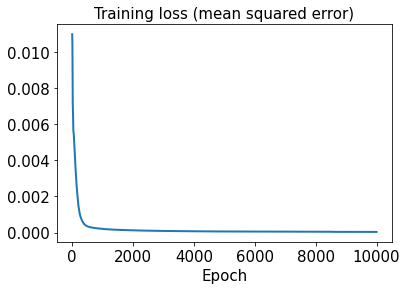

In [46]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

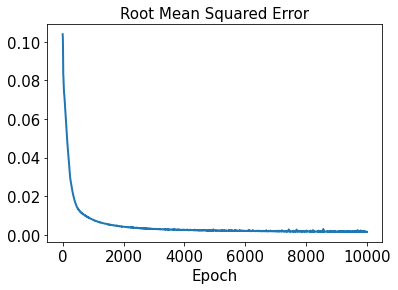

In [47]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [48]:
test_results = sd.evaluate(x_train)

5/5 [==============================] - 0s 2ms/step - loss: 3.1071e-05 - rmse: 0.0000e+00


In [49]:
decoded_train = sd.predict(decoded_sensor_train)

In [50]:
decoded_test = sd.predict(decoded_sensor_test)

In [51]:
error_train_abs = np.abs(decoded_train - y_train)

In [52]:
error_test_abs = np.abs(decoded_test - y_test)

In [53]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.00036281752


In [54]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.09815624


In [55]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.00019517454, 0.0003982698, 0.000319916, 0.0005259879, 0.0001641057, 0.0002338963, 0.00022905183, 0.0008658517, 0.0005749397, 0.0012559352, 0.0008328312, 0.00044476255, 0.00013827055, 0.00068692723, 0.0001921726, 0.0003360331, 0.00022297435, 0.00035167186, 0.0002649672, 0.00040721908, 0.00067778764, 0.00027828582, 0.00023358532, 0.00062670815, 0.00019643715, 0.00018379549, 0.0004302888, 0.00033962293, 0.00039947662, 0.0003630819, 0.00046104327, 0.0003790125, 0.00038509342, 0.00037359985, 0.00022293373, 0.0003015384, 0.00046455688, 0.00070808665, 0.0005717615, 0.00034143345, 0.00042503685, 0.0004291996, 0.00019255771, 0.00026311108, 0.00076035276, 0.0005892165, 0.00010840231, 0.00054271606, 0.00049567944, 0.0009823607, 0.00038903815, 0.00014882929, 0.00024978654, 0.00041522895, 0.0005328335, 0.00047198485, 0.00018874327, 0.0005401409, 0.00038134097, 0.00015011826, 0.000529633, 0.00039916742, 0.00033759445, 0.00019680154, 0.0004887241, 0.00026752925, 0.00045868577, 0.0006028728, 0.0004

In [56]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.019059852, 0.001201286, 0.009113543, 0.0031957573, 0.0037736357, 0.055692818, 0.014948326, 0.005082517, 0.005207891, 0.06317208, 0.059195064, 0.012713768, 0.37370026, 0.0040464913, 0.0025285992, 0.0027315074, 0.01181186, 0.02740697, 0.011879747, 0.008301835, 0.0018653199, 0.0121386405, 0.0034930862, 0.028091172, 1.2888712, 0.011006174, 0.06488614, 0.0027133191, 0.071051374, 0.025028566, 0.0017462373, 0.009038843, 0.0019875467, 0.015389431, 0.8950378, 0.0868744, 0.0061333347, 0.0017177078, 0.0020460475, 0.14744364, 0.4474006, 0.028115878, 0.0010056505, 0.0029685523, 0.024542931, 0.041806567, 0.0076260883, 0.015836421, 0.035856668, 0.5183704, 0.008472144, 0.0064571192, 0.6072033, 0.01339063, 0.0073869205, 0.012715423, 0.010082602, 0.0030737666, 0.023675576, 0.00842389, 0.015859505, 0.013175969, 0.0050886557, 0.0015808002, 0.6922837, 0.004657674, 0.013155198]


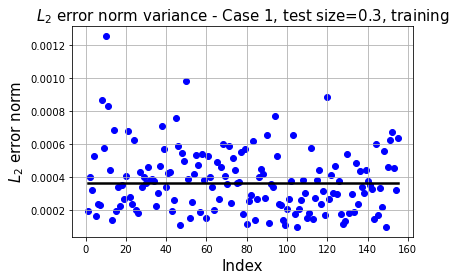

In [57]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 1, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

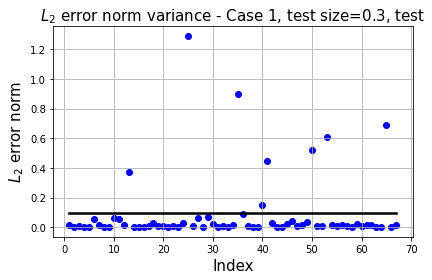

In [58]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 1, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

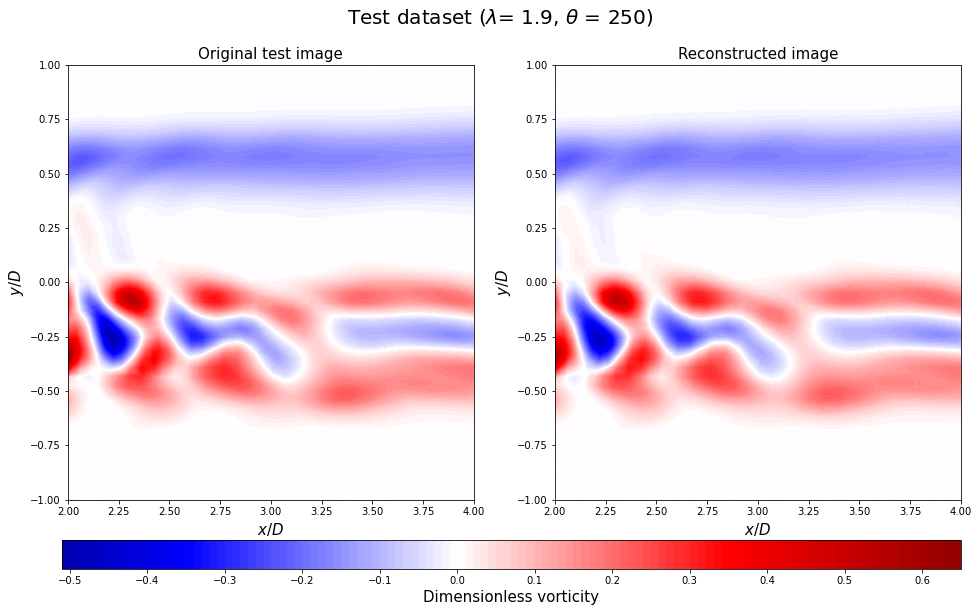

In [59]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

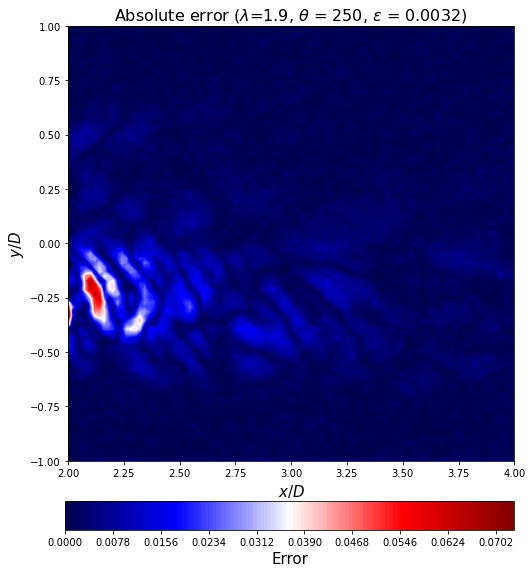

In [60]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()